In [1]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud_2020 #pip install -U git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git

#All these packages need to be installed from pip
#For ML
import sklearn
import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import sklearn.neural_network
import sklearn.decomposition
import pickle

import nltk #For tokenizing and normalizing
import numpy as np #arrays
import matplotlib.pyplot as plt #Plots
import matplotlib.colors # For nice colours
import seaborn #Makes plots look nice, also heatmaps
import scipy as sp #for interp

#These are from the standard library
import collections
import os
import os.path
import random
import re
import glob
import pandas
import requests
import json
import math

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

In [13]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

## Artificial Datasets

In [4]:
noise = [0.2, 0.8]
data_dict = {}

for i in noise:
    df_key = "adf_" + str(i)
    data_dict[df_key + "_and"] = lucem_illud_2020.andSplit(i)
    data_dict[df_key + "_xor"] = lucem_illud_2020.xorSplit(i)
    data_dict[df_key + "_target"] = lucem_illud_2020.targetSplit(i)
    data_dict[df_key + "_blob"] = lucem_illud_2020.multiBlobs(i)
    
data_dict["adf_rand"] = lucem_illud_2020.random()
data_dict["adf_0.5_xor"] = lucem_illud_2020.xorSplit(0.5)    

In [38]:
with open('synth_datadict.pkl', 'wb') as f:
    pickle.dump(data_dict, f)

In [28]:
clf_names = [
    ("Naive Bayes", "nbayes"), 
    ("Linear SVM", "lsvm"),
    ("Polynomial SVM", "psvm"),
    ("k-Nearest Neighbors", "knn"),
    ("Logistic Regression", "logit"),
    ("Decision Tree", "dtree"),
    ("Random Forest", "rf"),
    ("Neural Net", "nn_mlp"),
    ("Gradient Boosting", "gboost"),
    ("AdaBoost", "adaboost")
]
clf_list = [
    sklearn.naive_bayes.GaussianNB(),
    sklearn.svm.SVC(kernel = 'linear', probability = True), 
    sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True),
    sklearn.neighbors.KNeighborsClassifier(5, weights='distance'),
    sklearn.linear_model.LogisticRegression(),
    sklearn.tree.DecisionTreeClassifier(),
    sklearn.ensemble.RandomForestClassifier(),
    sklearn.neural_network.MLPClassifier(),
    sklearn.ensemble.GradientBoostingClassifier(),
    sklearn.ensemble.AdaBoostClassifier()
]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Artifical Dataset 1: adf_0.2_and


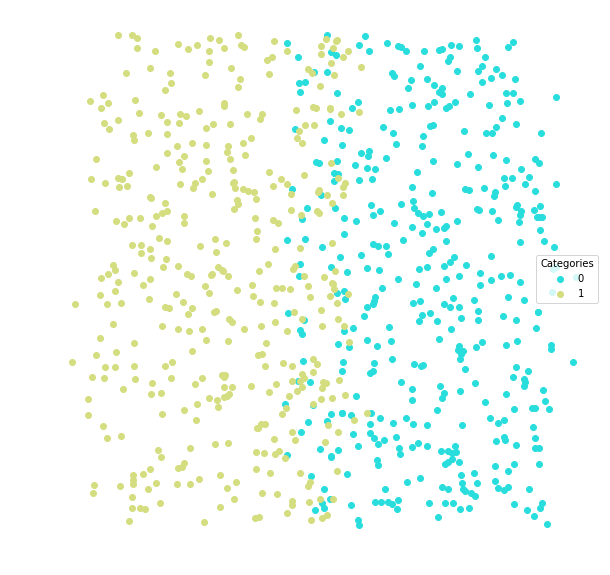

Method: Naive Bayes
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.09  0.908615   0.911111           0.862077  0.891304
1               0.09  0.908615   0.909091           0.881751  0.925926


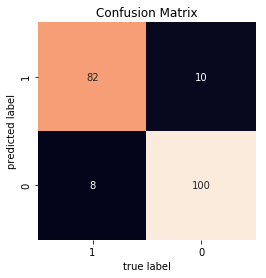

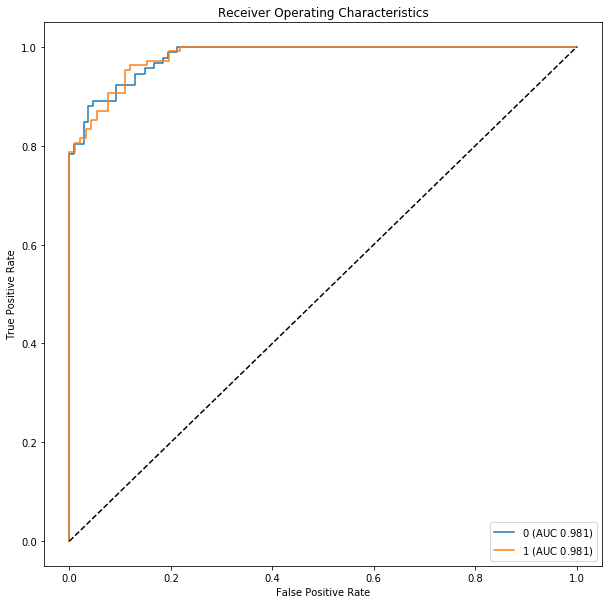

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


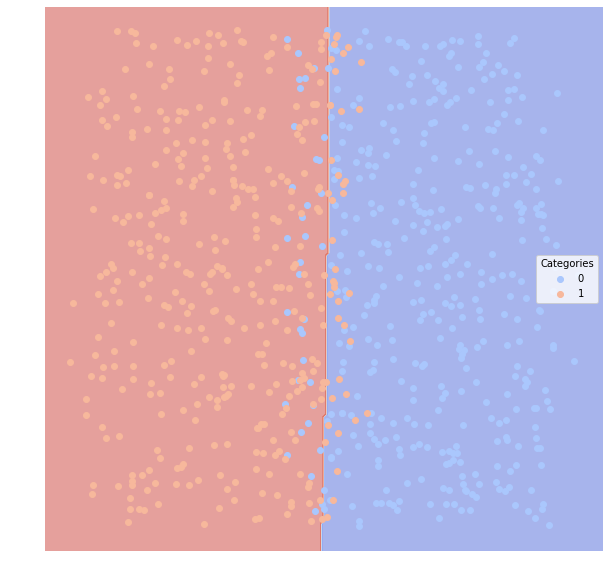

Method: Linear SVM
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.08  0.917069   0.941860           0.884247  0.880435
1               0.08  0.917069   0.903509           0.886680  0.953704


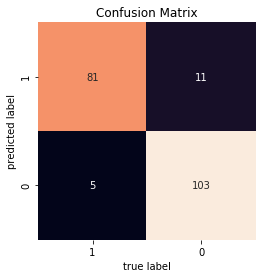

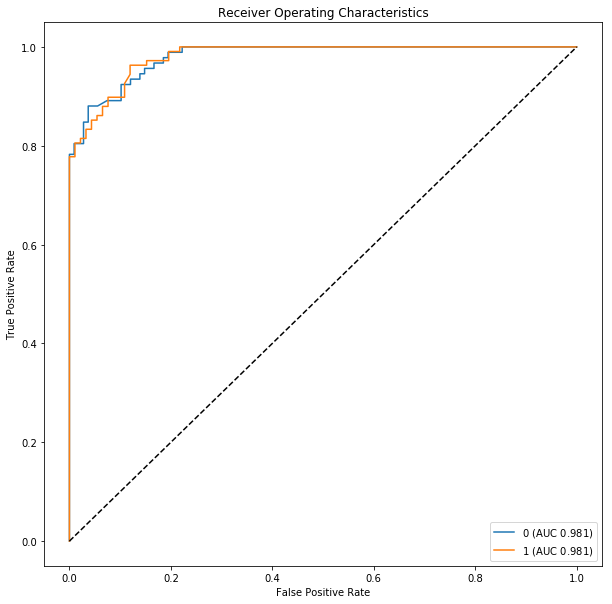

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


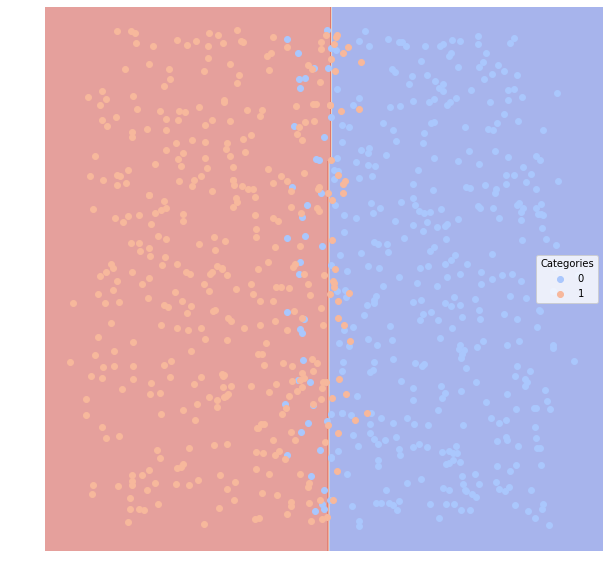

Method: Polynomial SVM
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.115  0.877415       0.96           0.851304  0.782609
1              0.115  0.877415       0.84           0.831667  0.972222


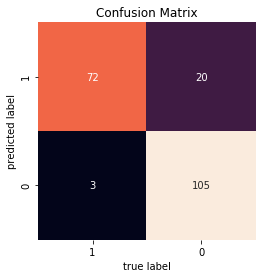

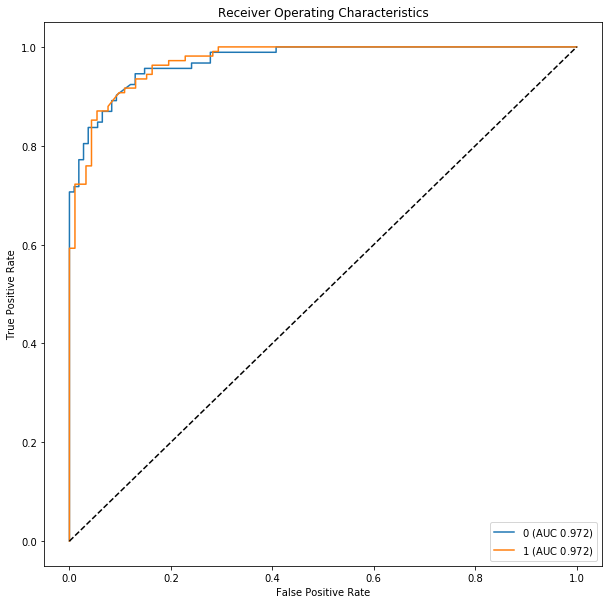

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


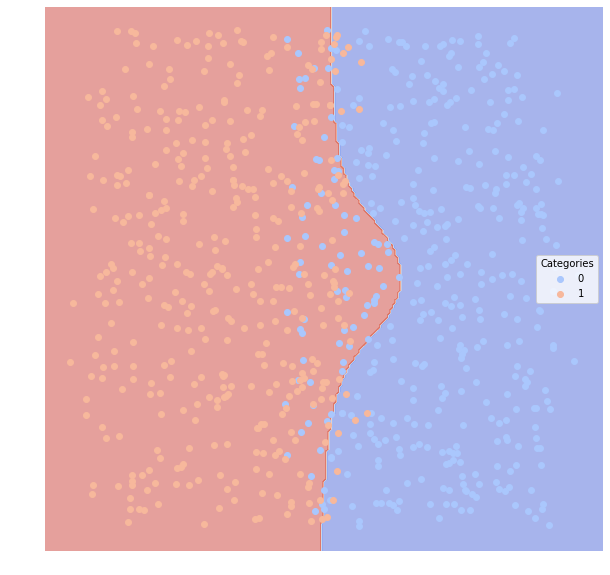

Method: k-Nearest Neighbors
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.105  0.893921   0.890110           0.838684  0.880435
1              0.105  0.893921   0.899083           0.865834  0.907407


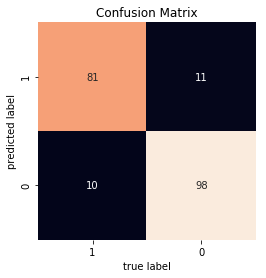

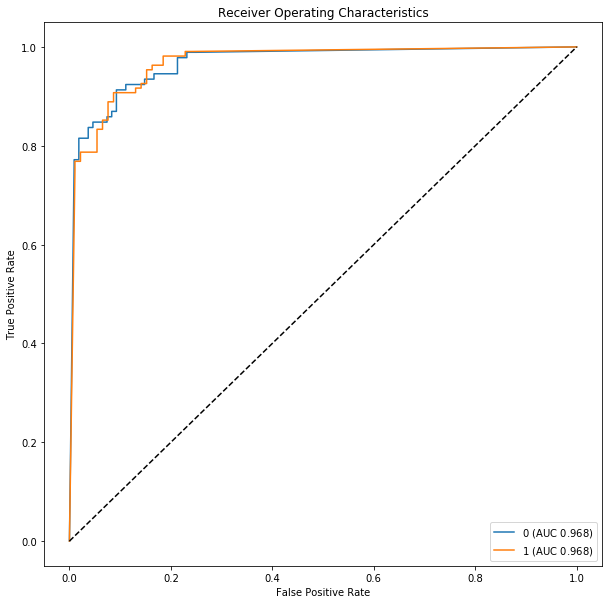

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


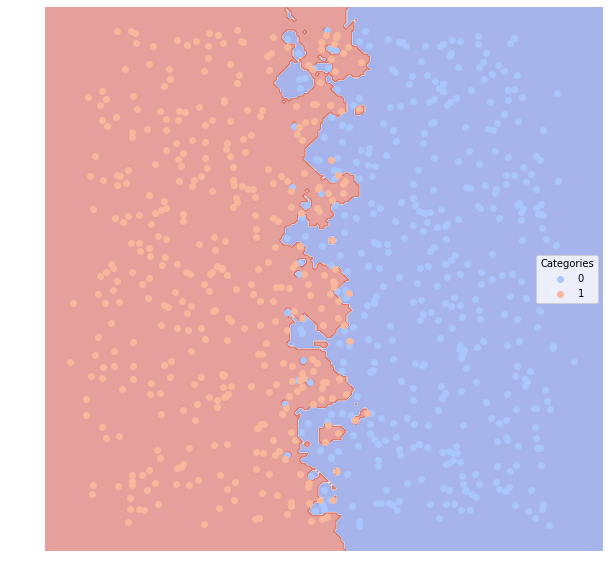

Method: Logistic Regression
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.09  0.908615   0.911111           0.862077  0.891304
1               0.09  0.908615   0.909091           0.881751  0.925926


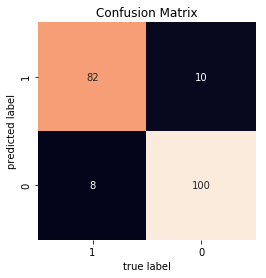

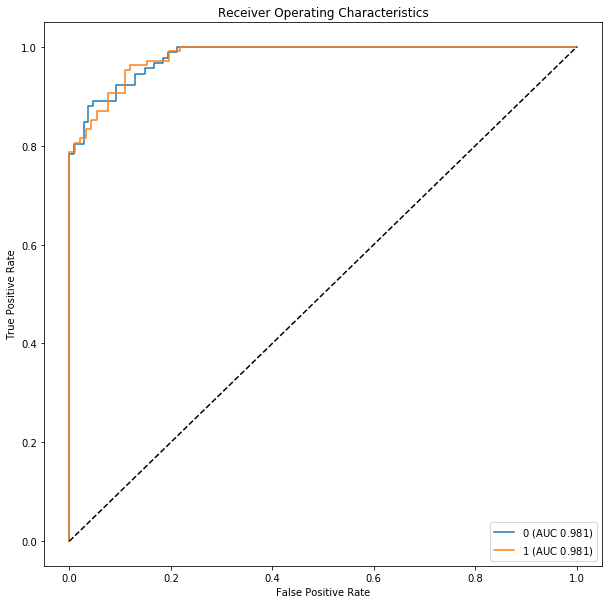

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


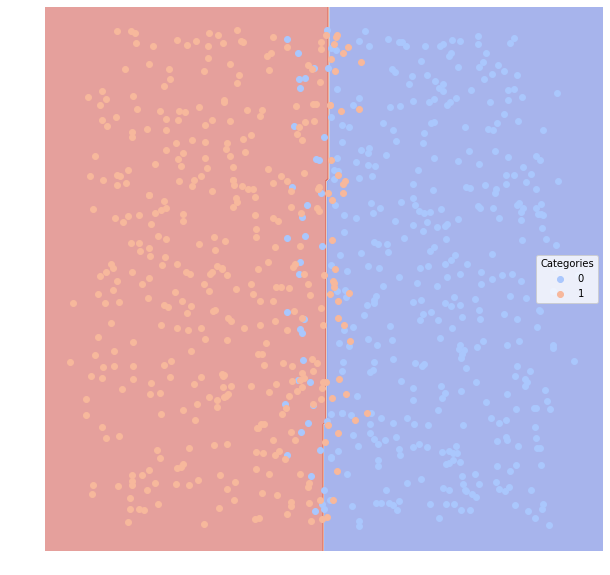

Method: Decision Tree
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.09  0.911031   0.885417           0.853048  0.923913
1               0.09  0.911031   0.932692           0.892696  0.898148


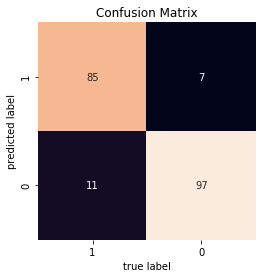

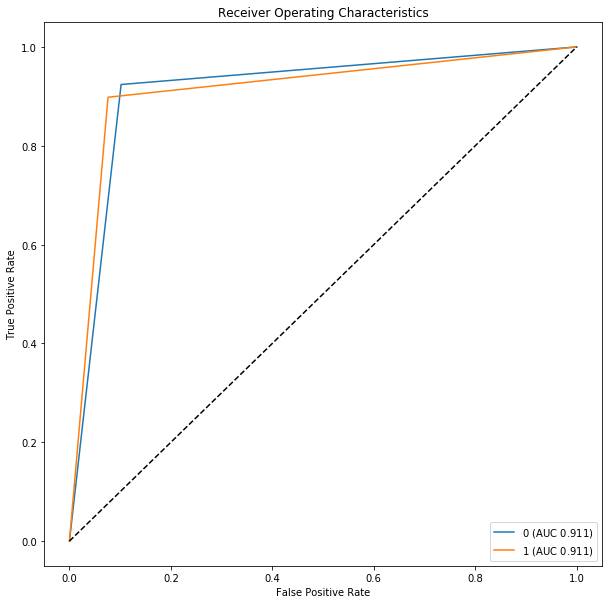

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


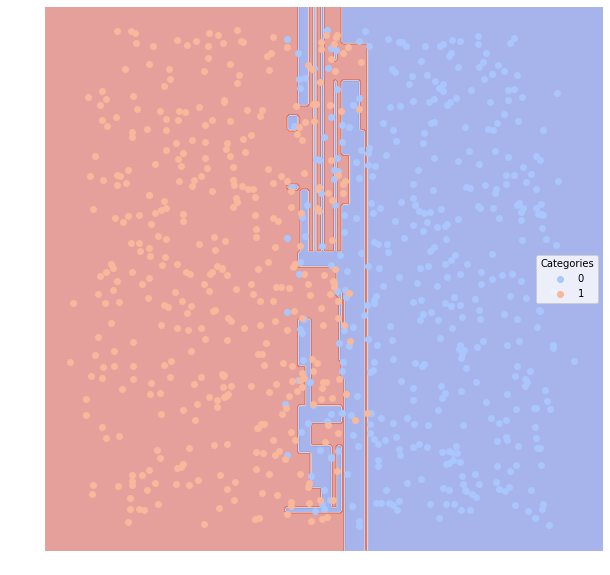

Method: Random Forest
          Error_Rate      AUC  Precision  Average_Precision    Recall
Category                                                             
0               0.09  0.90942   0.902174           0.858918  0.902174
1               0.09  0.90942   0.916667           0.885278  0.916667


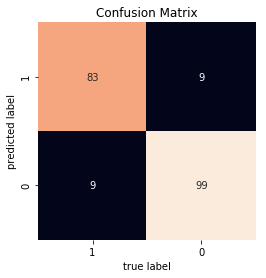

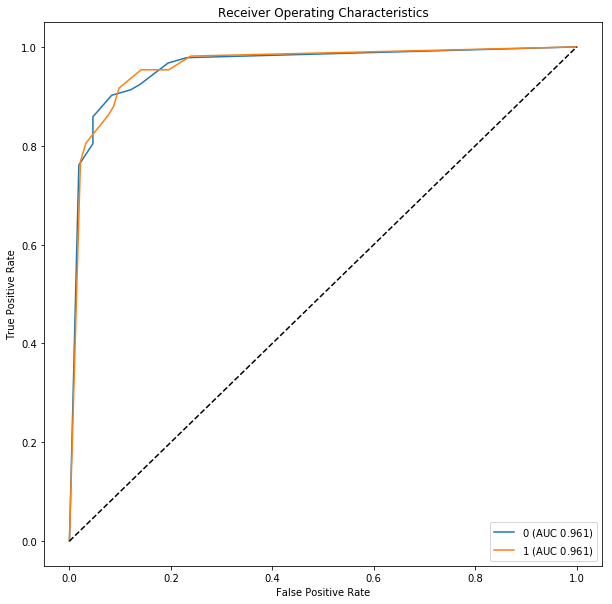

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


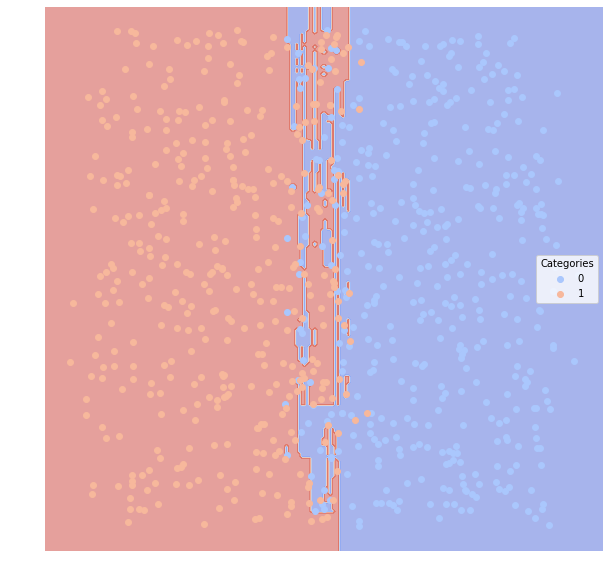

Method: Neural Net
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.095  0.903986   0.901099           0.853153  0.891304
1              0.095  0.903986   0.908257           0.877569  0.916667


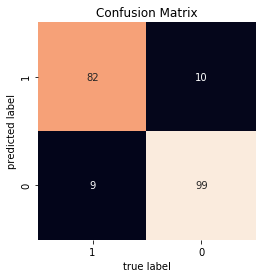

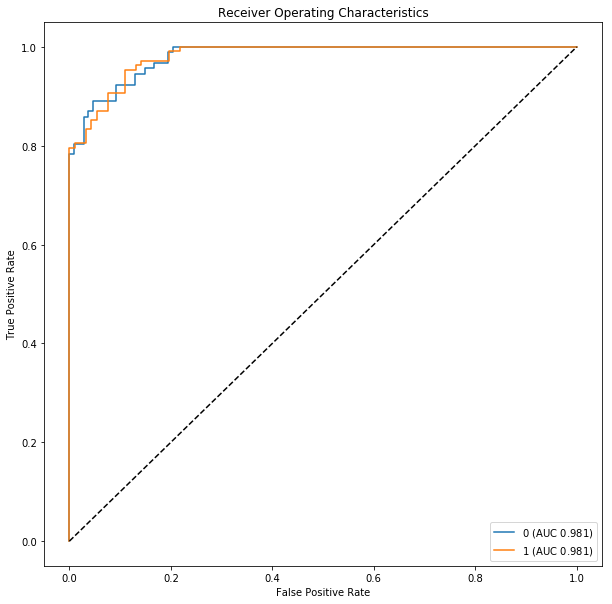

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


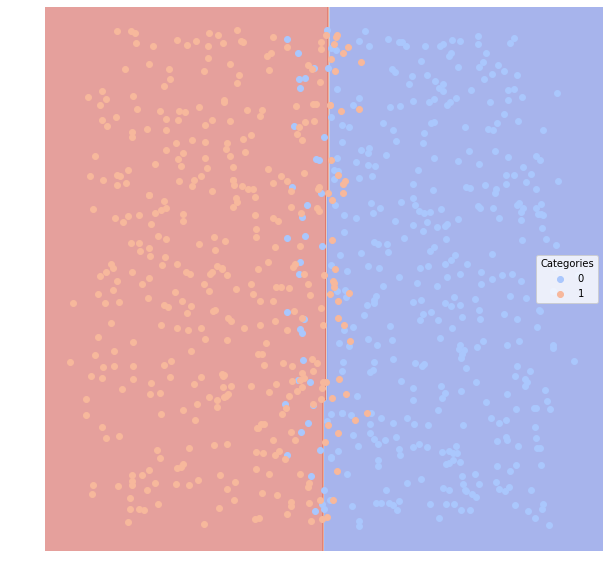

Method: Gradient Boosting
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.105  0.892311   0.908046           0.844735  0.858696
1              0.105  0.892311   0.884956           0.859403  0.925926


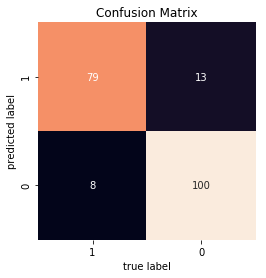

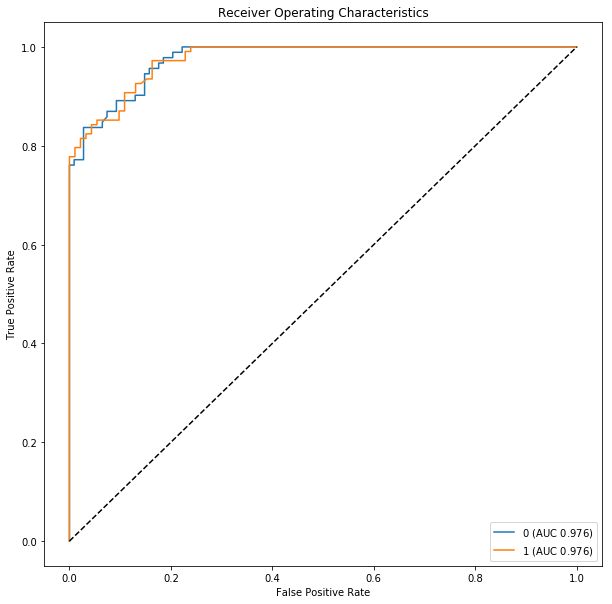

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


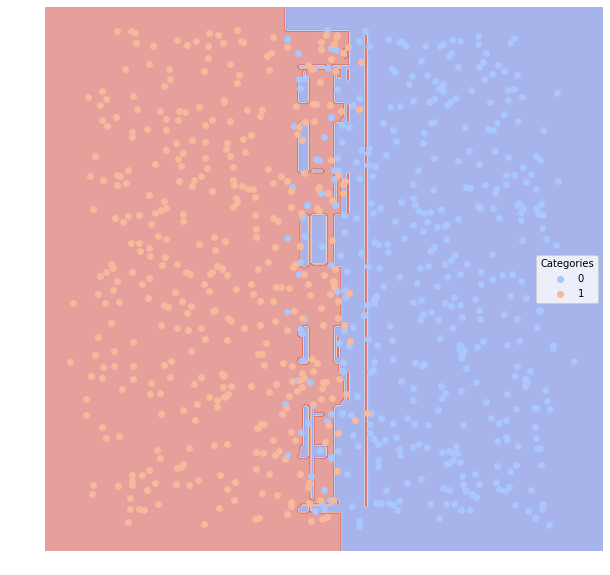

Method: AdaBoost
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.085  0.910829   0.951807           0.882313  0.858696
1              0.085  0.910829   0.888889           0.875967  0.962963


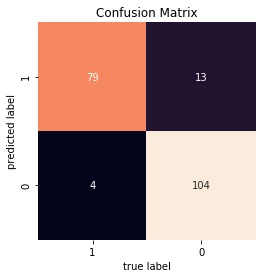

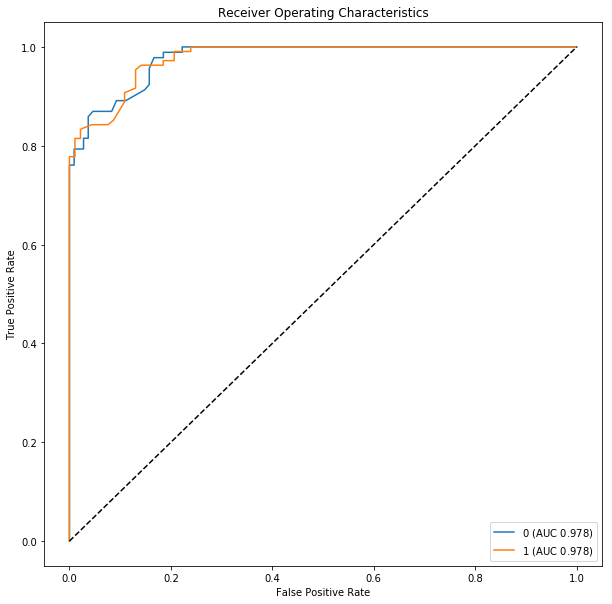

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


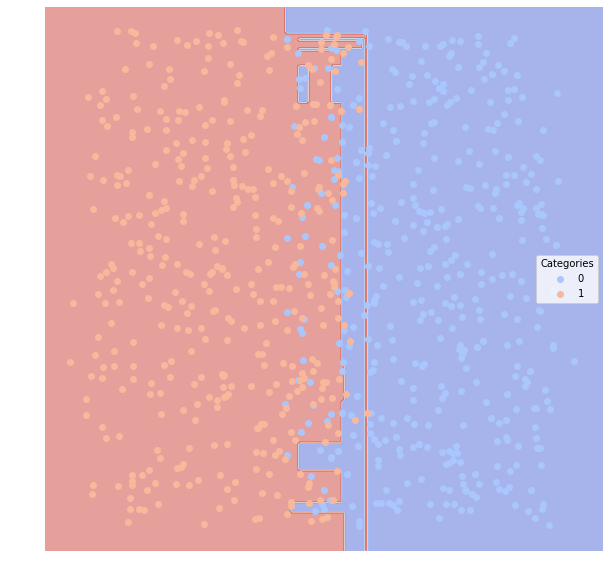

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Artifical Dataset 2: adf_0.2_xor


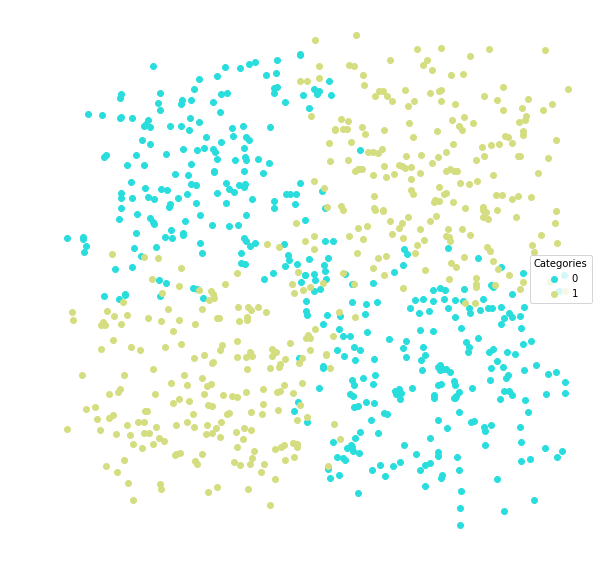

Method: Naive Bayes
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.405  0.598655   0.640449           0.589393  0.537736
1              0.405  0.598655   0.558559           0.528411  0.659574


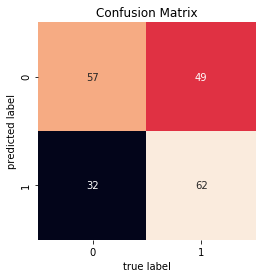

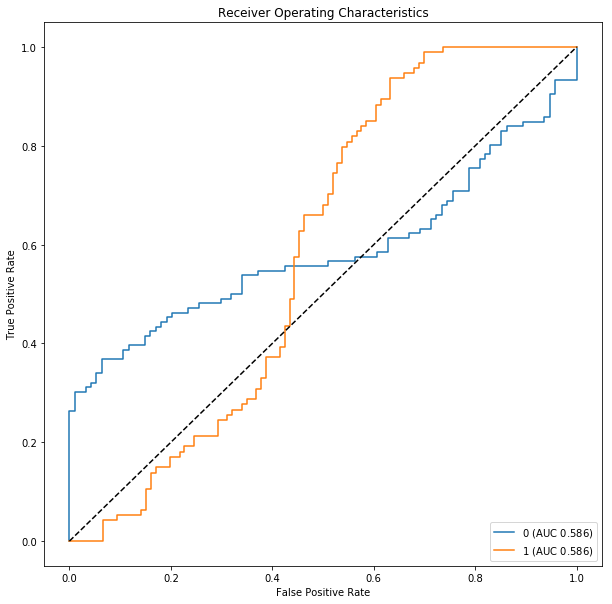

In [ ]:
i = 1
for df_name, df_array in data_dict.items():
    dfTrain, dfTest = lucem_illud_2020.trainTestSplit(df_array)
    print("Artifical Dataset {}: {}".format(i, df_name))
    lucem_illud_2020.plotter(dfTrain)
    
    for name, clf in zip(clf_names, clf_list):
        print("Method: {}".format(name[0]))
        clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
        score = clf.score(np.stack(dfTest['vect'], axis=0), dfTest['category'])
        print(lucem_illud_2020.evaluateClassifier(clf, dfTest))
        lucem_illud_2020.plotConfusionMatrix(clf, dfTest)
        lucem_illud_2020.plotMultiROC(clf, dfTest)
        lucem_illud_2020.plotregions(clf, dfTrain)
        
    i += 1    

## andSplit Data (noise = 0.2, 0.8)

For noise = 0.2, the best performing model was the Naive Bayes classifier with an AUC of 0.966. We had two easily distinguishable classes with little overlap, and an almost linear decision boundary was sufficient to distinguish the classes. Almost all models did well here (except Decision Trees).

For noise = 0.8, the best performing model was kNN. The high noise parameter translates into both classes being diffued in the gridspace, making the identification of a decision boundary extremely difficult. kNN works on localized search, so it does better than one-shot-contour based methods. Other ensemble methods have comparable performance.


## xorSplit Data (noise = 0.2, 0.8, 0.5)

For noise = 0.2, kNN, Neural Nets, and Gradient Boost performed best with an AUC around 0.95. The presence of two sets of non-linear decision boundaries (creating the X-shape, splitting data into 4 quadrants) caused linear models and one-shot classifiers to under-perform. I'm not sure why Random Forests underperformed though. 

For noise = 0.8, Neural Nets performed best with an AUC of 0.71. In all likelihood, they must've been able to identify the systematic noise underlying the data-generation process to improve classification. Almost all other models did as good as a random guess.

For noise = 0.5, Neural Nets and kNN do best with an AUC of 0.83 and 0.79. 

## targetSplit Data (noise = 0.2, 0.8)

For noise = 0.2, Naive Bayes and Neural Nets achieved an AUC of 0.98. Again, the decision boundary was a single non-linear contour, which explains why most of the classifiers did well (except logistic and linear SVM). Since the true decision boundary was a circle, a polynomial kernel for the SVM was suboptimal, a radial basis function would improve its performance.

For noise = 0.8, Naive Bayes and Neural Nets did best with an AUC of 0.62. In spite of the high noise, these two models could estimate a region where one class had a higher likelihood of being present. The decision boundary of the Neural Nets is almost similar to the one generated by Naive Bayes. Linear classifiers failed for the same reason as the earlier case. Most models did as well as a random guess.

## multiBlobs Data (noise = 0.2, 0.8)

For noise = 0.2, almost all models had near perfect performance. The large distance between any two blobs in the data makes the creation of decision boundaries easy.

For noise = 0.8, almost every model (except AdaBoost) does extremely well. Even with the increased noise, the ease of assignment of distinct continguous regions of the search space to each class makes this an easy enough case to classify.

## random Data

Everything performs terribly, which is to be expected -- there is no logic to the data-generation process.

## Real Datasets

In [ ]:
realdata_dict = {}

realdata_dict["Reddit"] = lucem_illud_2020.loadReddit()

In [18]:
realdata_dict["SenateSmall"] = lucem_illud_2020.loadSenateSmall()
realdata_dict["SenateLarge"] = lucem_illud_2020.loadSenateLarge()
realdata_dict["Spam"] = lucem_illud_2020.loadSpam()
#realdata_dict["NewsGroups"] = lucem_illud_2020.loadNewsGroups()

Loading senate data
Converting to vectors
Loading senator: Kyl
Loading senator: Klobuchar
Loading senator: Kennedy
Loading senator: Kohl
Loading senator: Kerry
Converting to vectors
Loading Spam
Loading Ham
Converting to vectors


URLError: <urlopen error [Errno 110] Connection timed out>

In [39]:
with open('real_datadict.pkl', 'wb') as f:
    pickle.dump(realdata_dict, f)

In [33]:
realdata_dict.keys()
realclf_list = [
    sklearn.naive_bayes.MultinomialNB(),
    sklearn.svm.SVC(kernel = 'linear', probability = True), 
    sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True),
    sklearn.neighbors.KNeighborsClassifier(5, weights='distance'),
    sklearn.linear_model.LogisticRegression(),
    sklearn.tree.DecisionTreeClassifier(),
    sklearn.ensemble.RandomForestClassifier(),
    sklearn.neural_network.MLPClassifier(),
    sklearn.ensemble.GradientBoostingClassifier(),
    sklearn.ensemble.AdaBoostClassifier()
]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

Real Dataset 1: Reddit


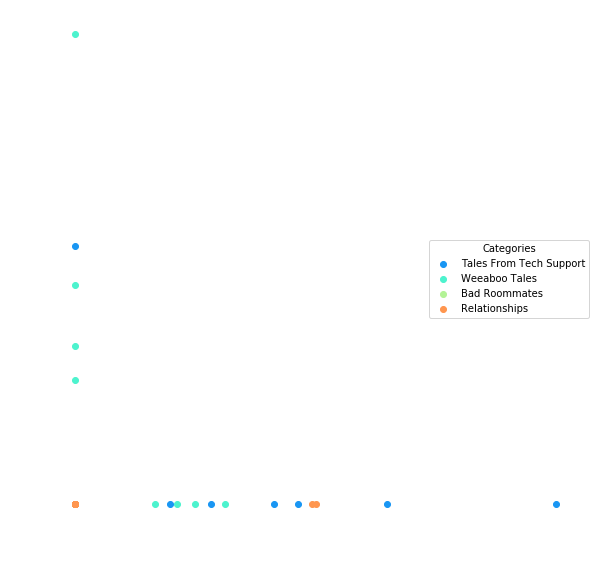

Method: Naive Bayes; (Real Dataset 1: Reddit)


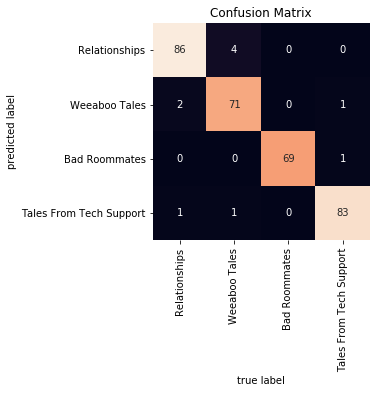

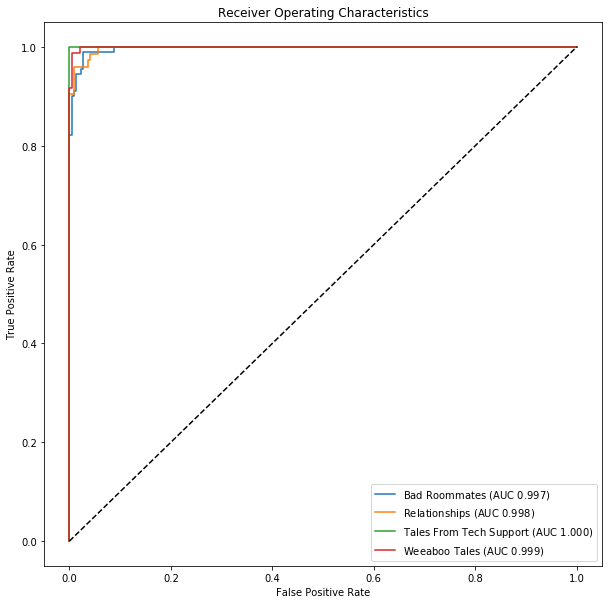

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

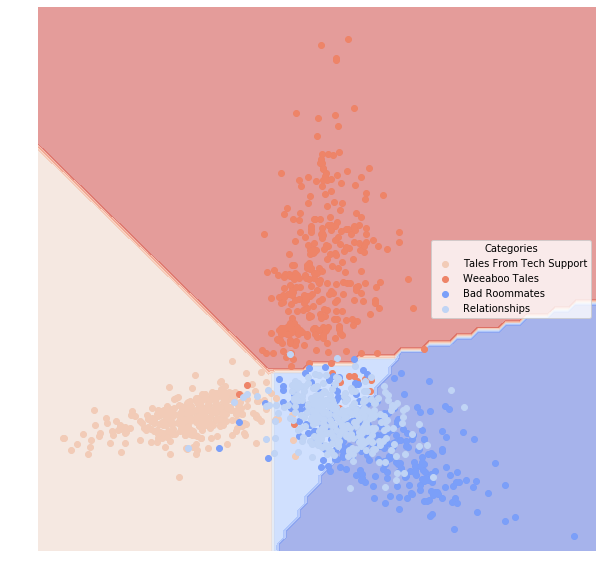

Method: Linear SVM; (Real Dataset 1: Reddit)


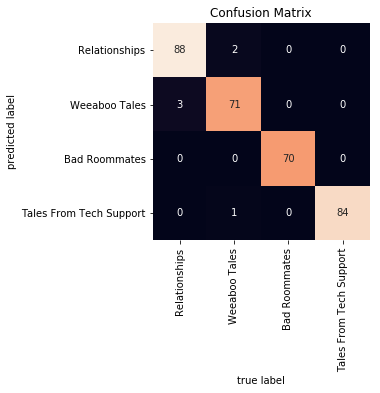

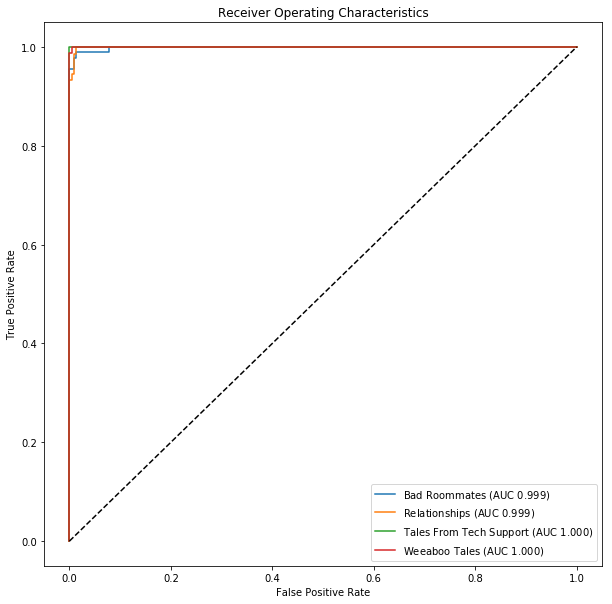

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

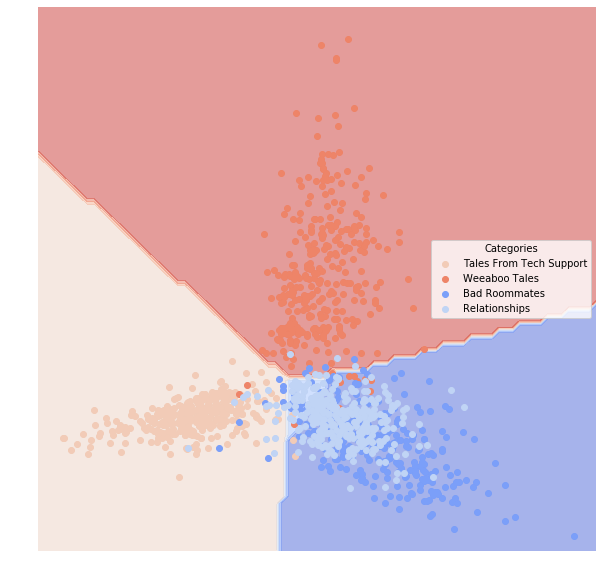

Method: Polynomial SVM; (Real Dataset 1: Reddit)


/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/software/A

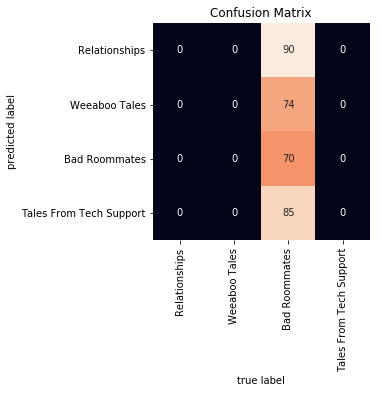

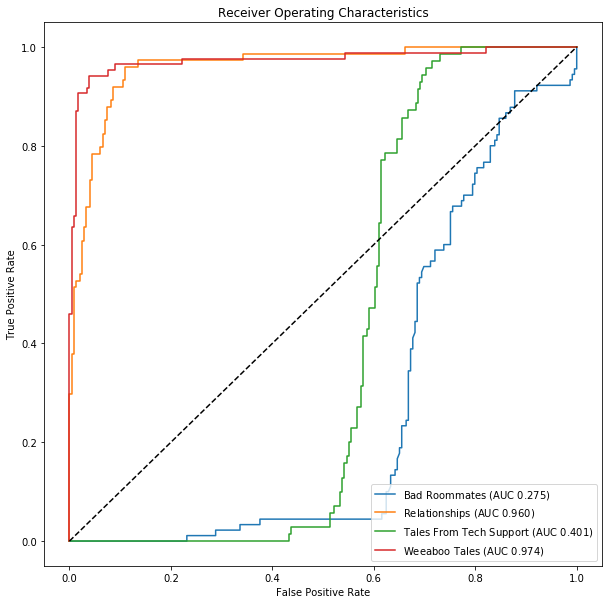

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

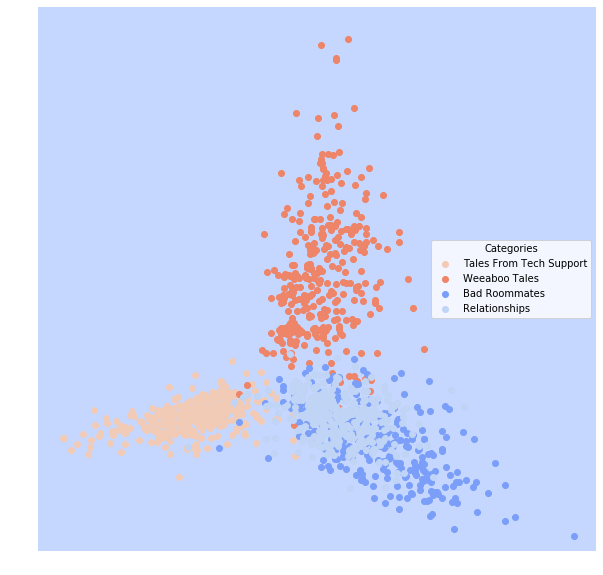

Method: k-Nearest Neighbors; (Real Dataset 1: Reddit)


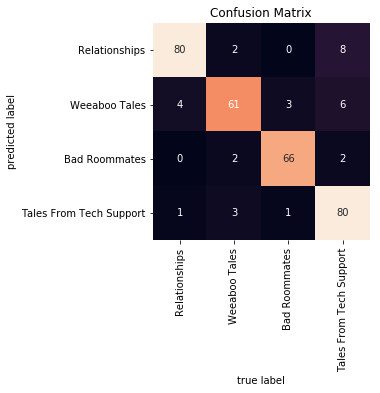

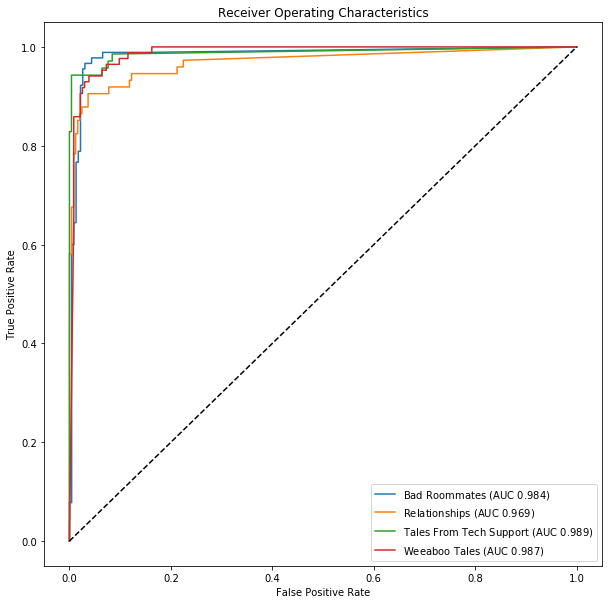

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

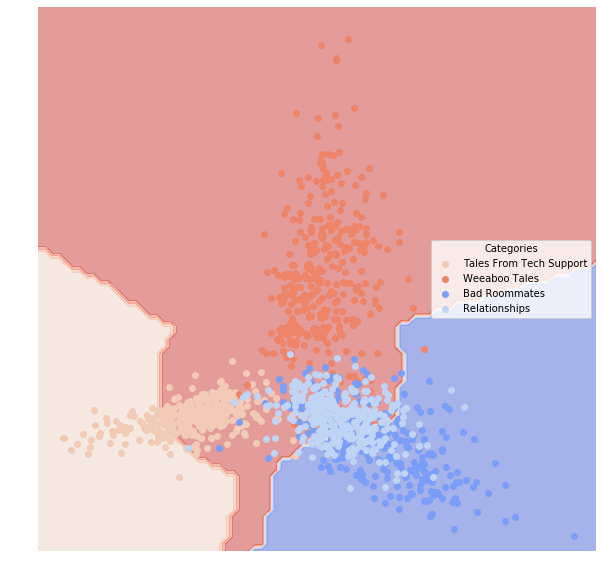

Method: Logistic Regression; (Real Dataset 1: Reddit)


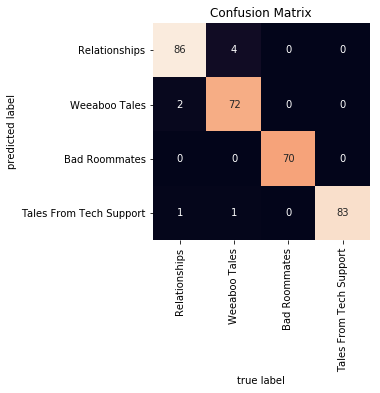

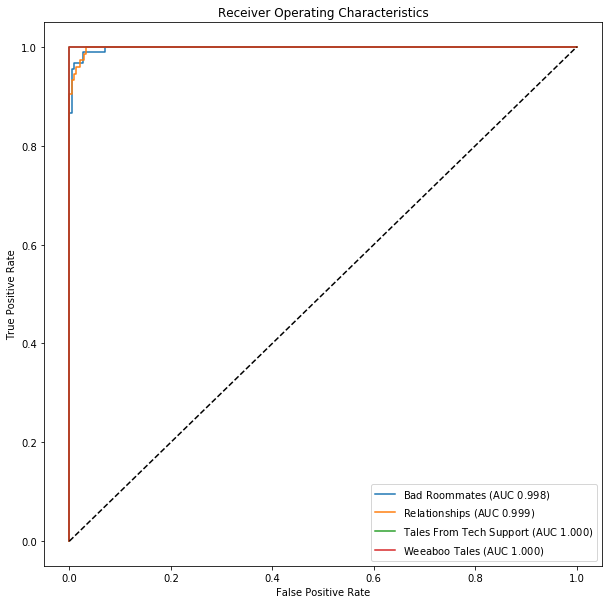

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

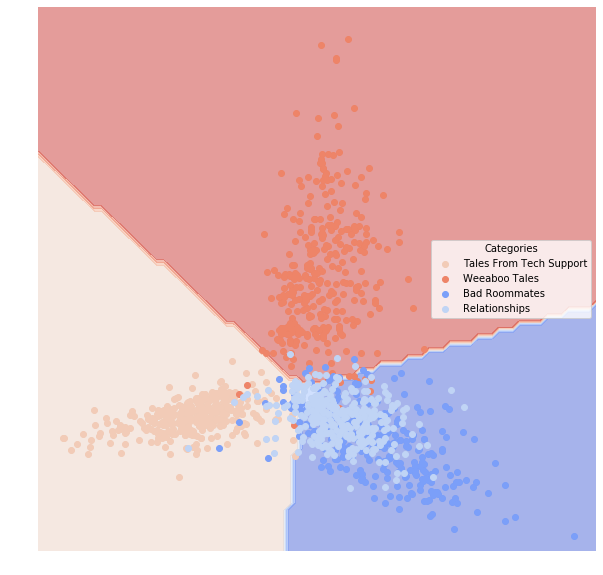

Method: Decision Tree; (Real Dataset 1: Reddit)


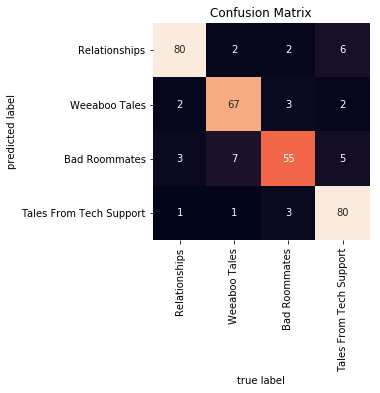

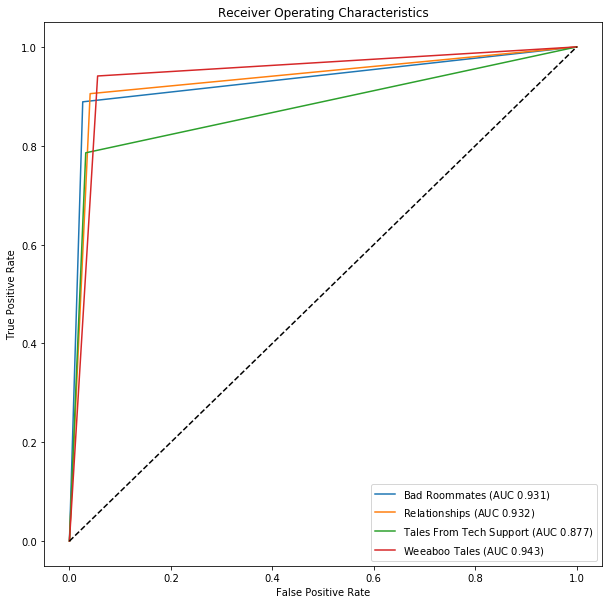

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

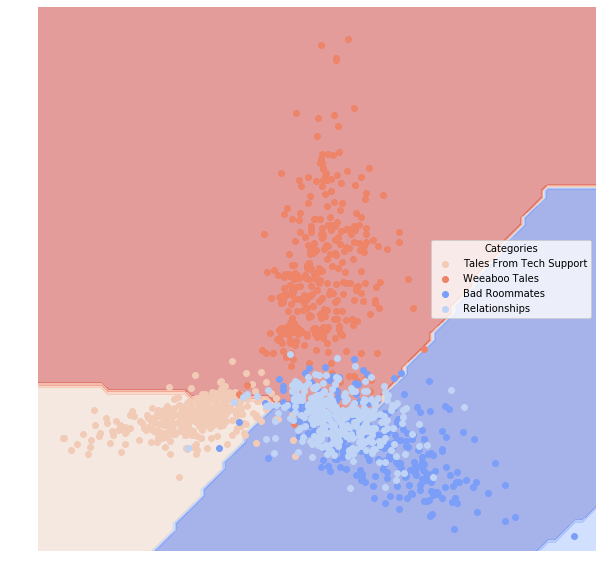

Method: Random Forest; (Real Dataset 1: Reddit)


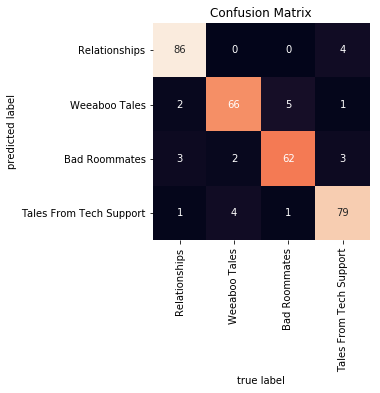

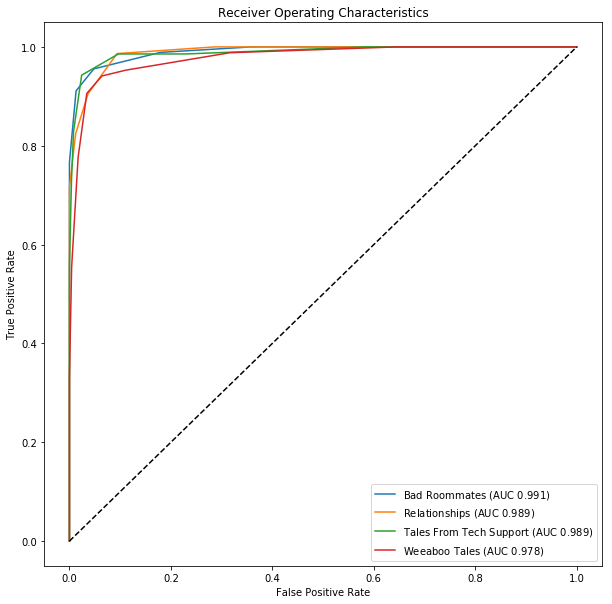

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

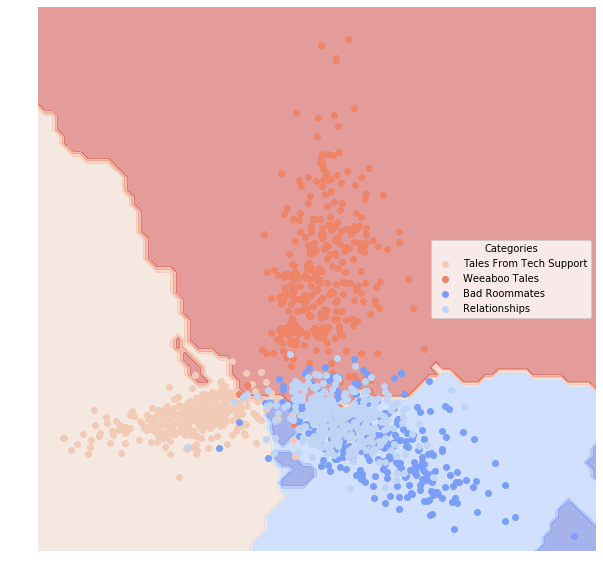

Method: Neural Net; (Real Dataset 1: Reddit)


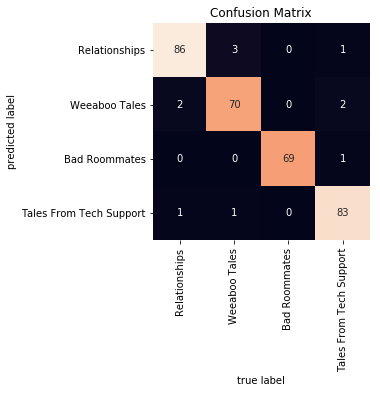

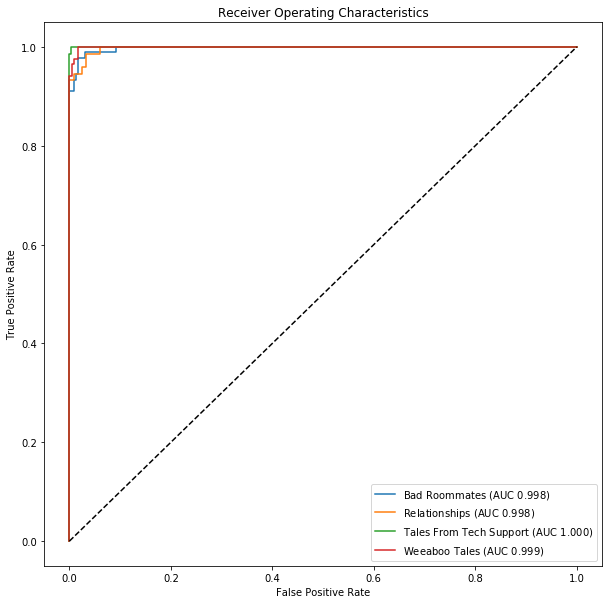

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

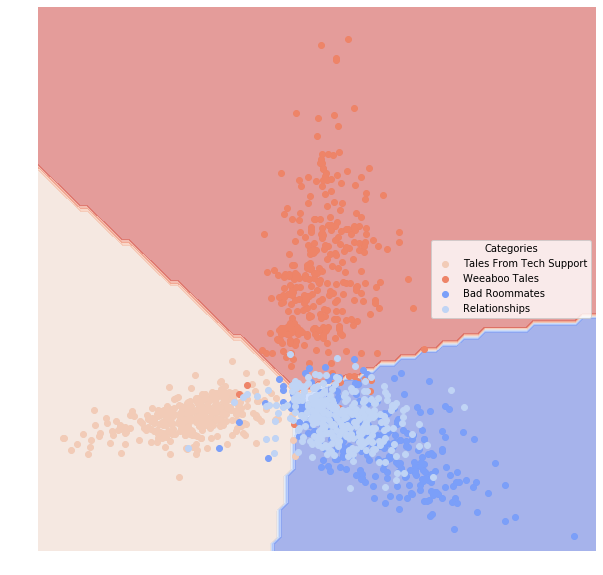

Method: Gradient Boosting; (Real Dataset 1: Reddit)


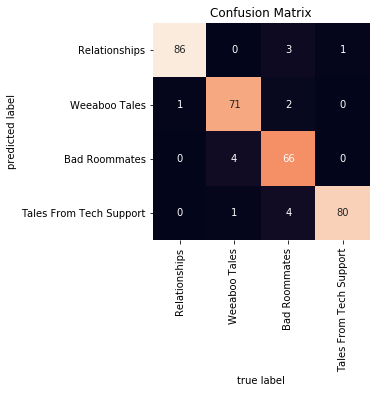

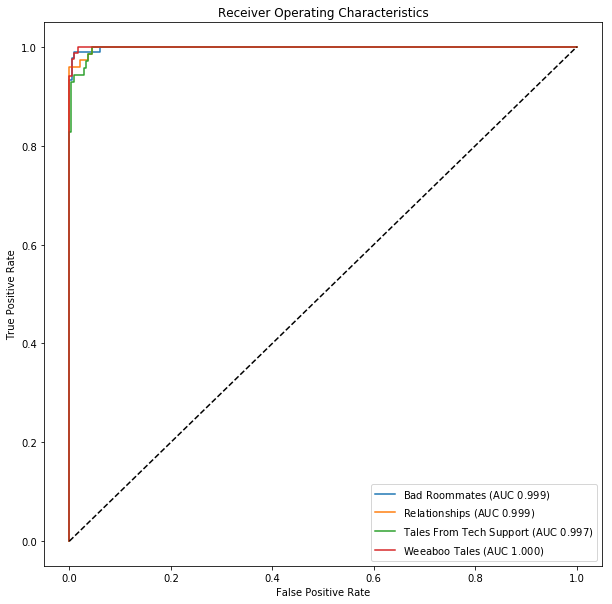

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

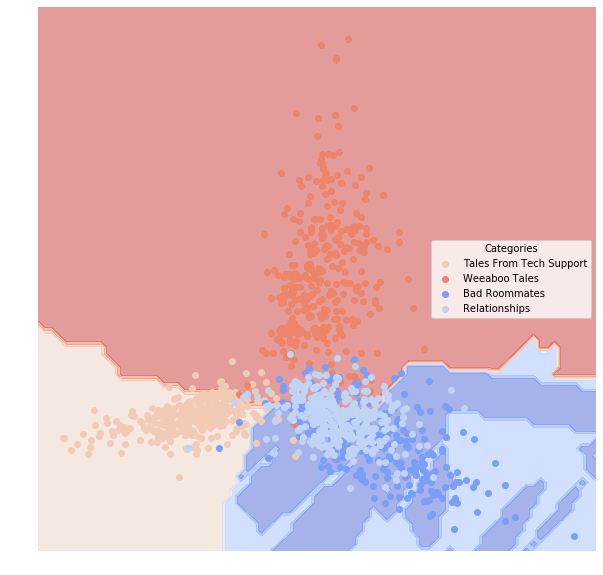

Method: AdaBoost; (Real Dataset 1: Reddit)


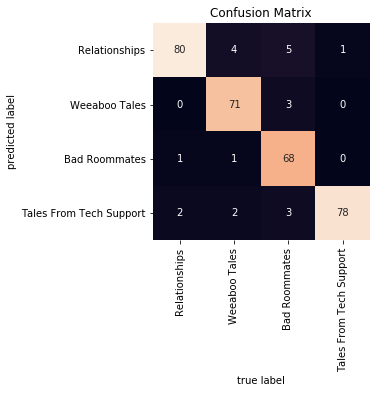

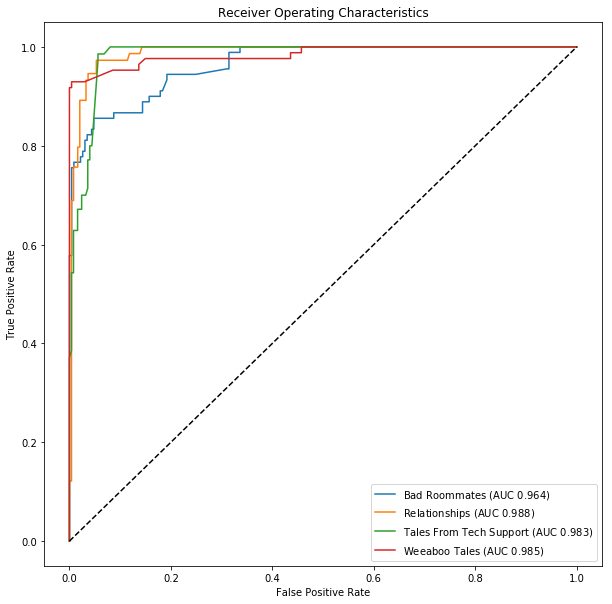

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

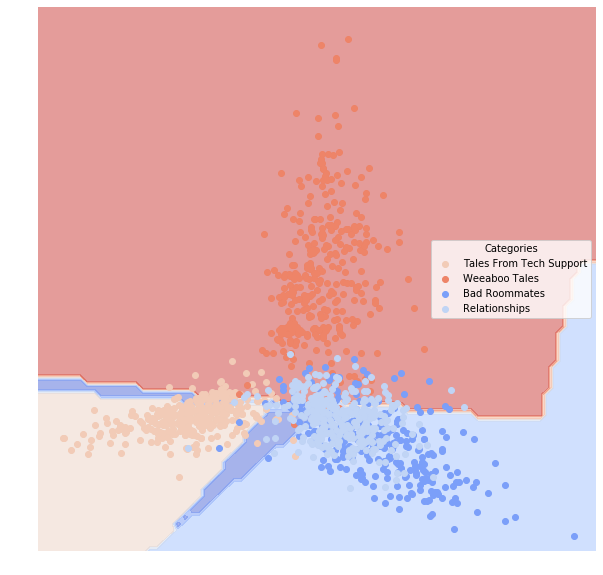

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Real Dataset 2: SenateSmall


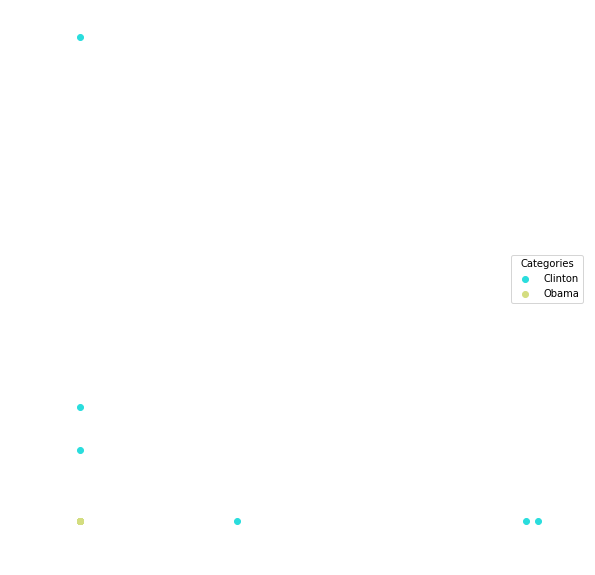

Method: Naive Bayes; (Real Dataset 2: SenateSmall)


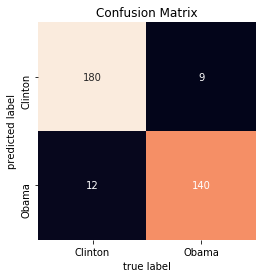

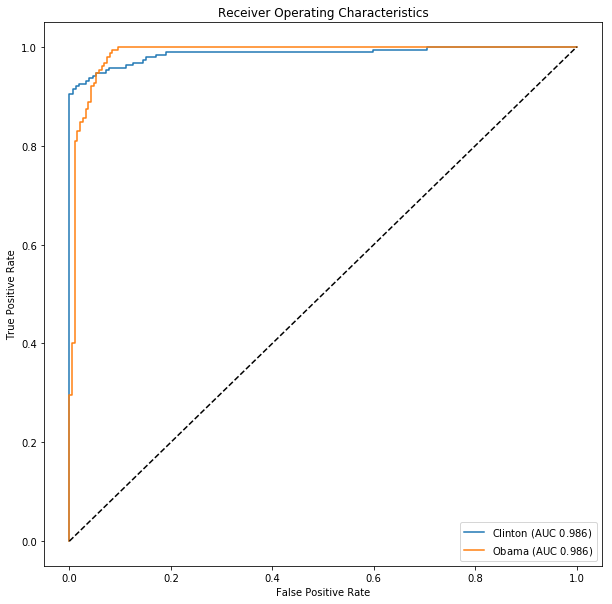

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


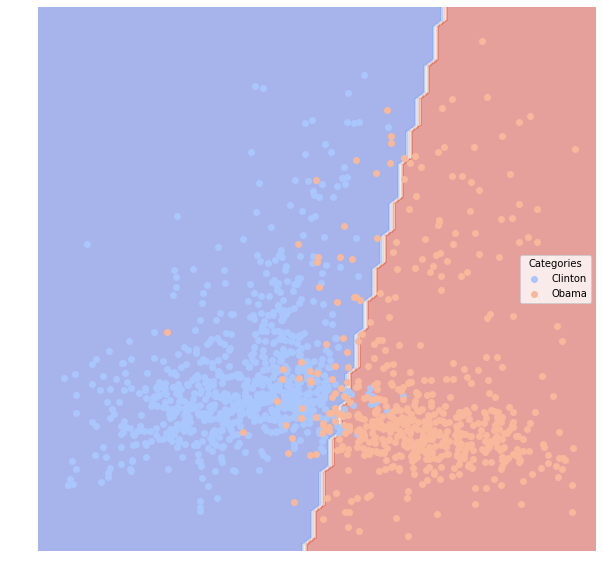

Method: Linear SVM; (Real Dataset 2: SenateSmall)


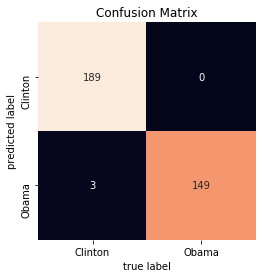

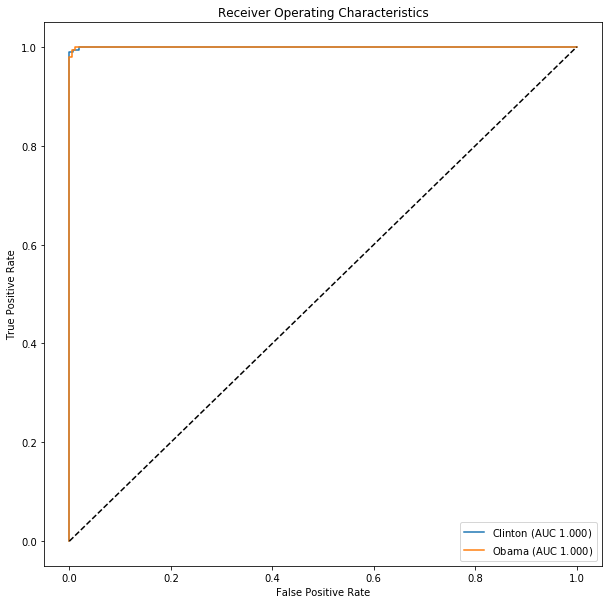

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


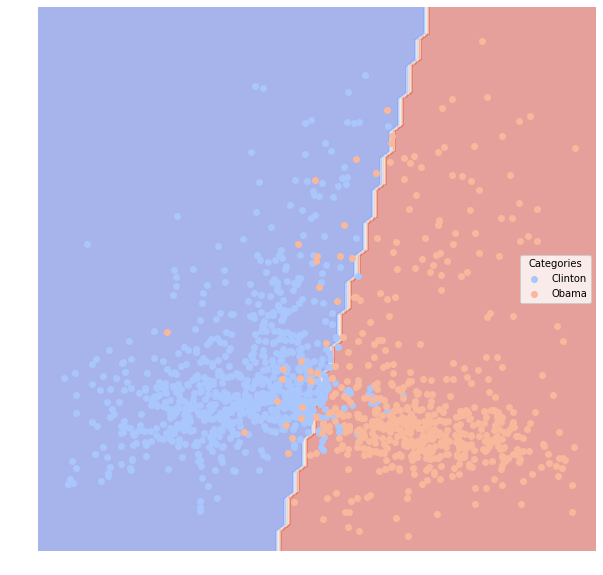

Method: Polynomial SVM; (Real Dataset 2: SenateSmall)


/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


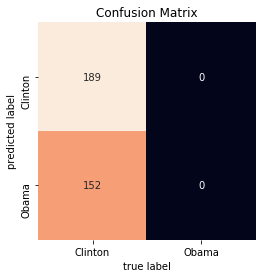

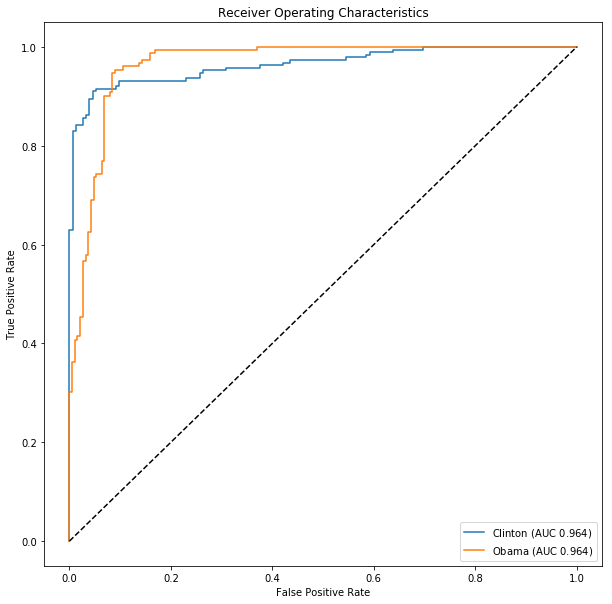

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


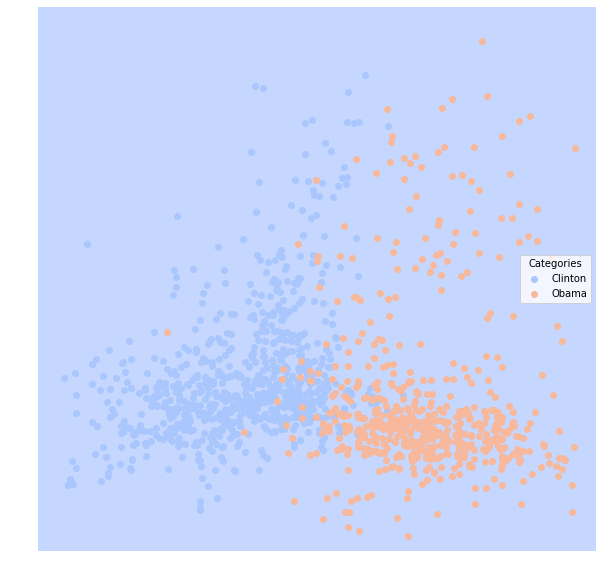

Method: k-Nearest Neighbors; (Real Dataset 2: SenateSmall)


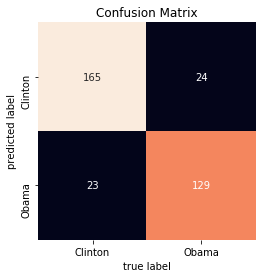

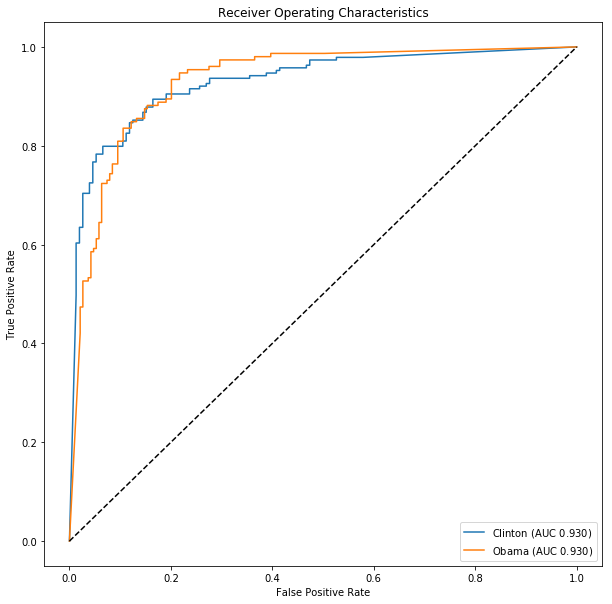

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


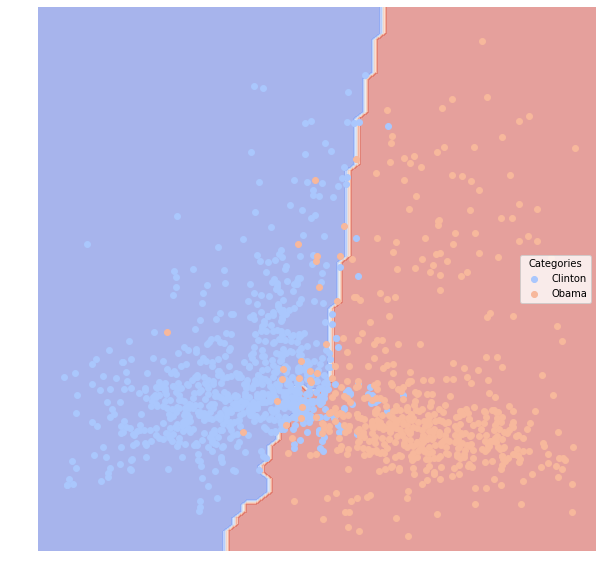

Method: Logistic Regression; (Real Dataset 2: SenateSmall)


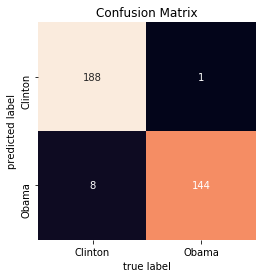

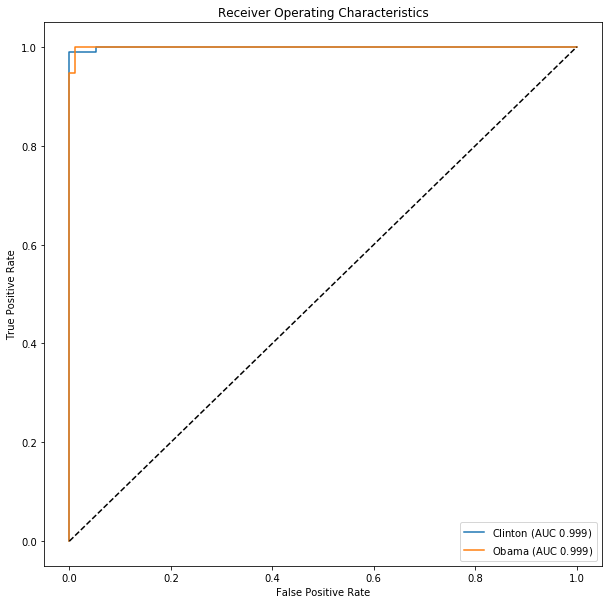

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


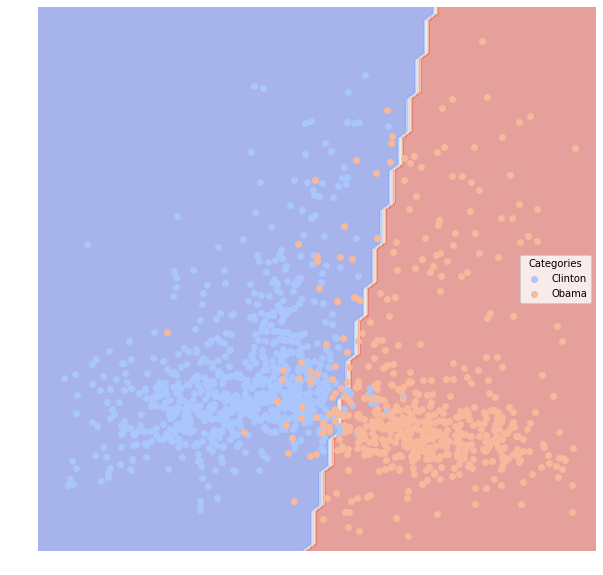

Method: Decision Tree; (Real Dataset 2: SenateSmall)


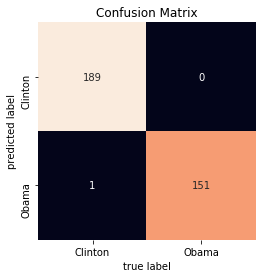

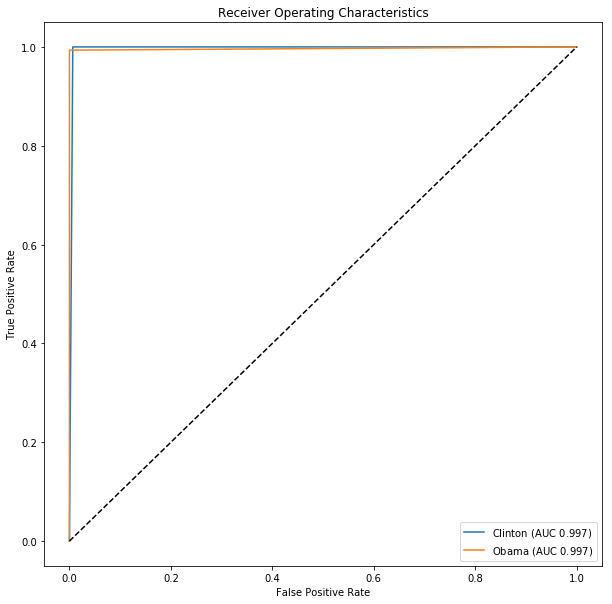

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


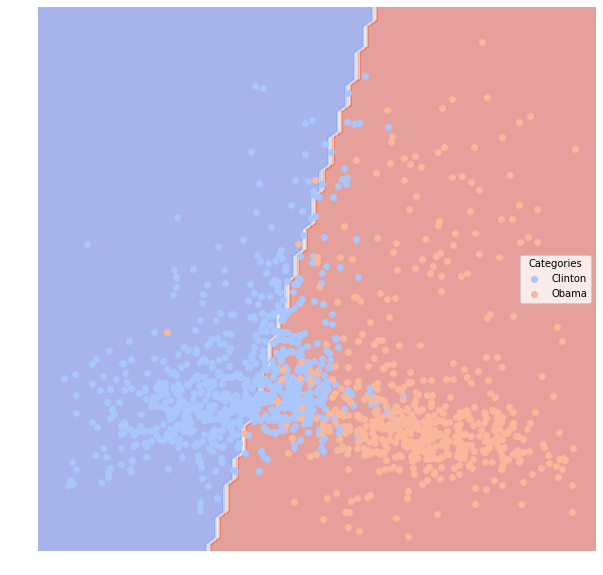

Method: Random Forest; (Real Dataset 2: SenateSmall)


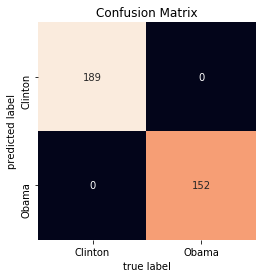

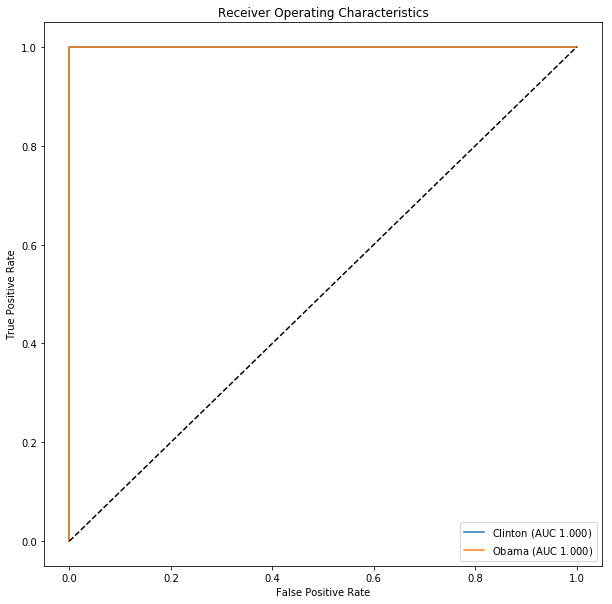

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


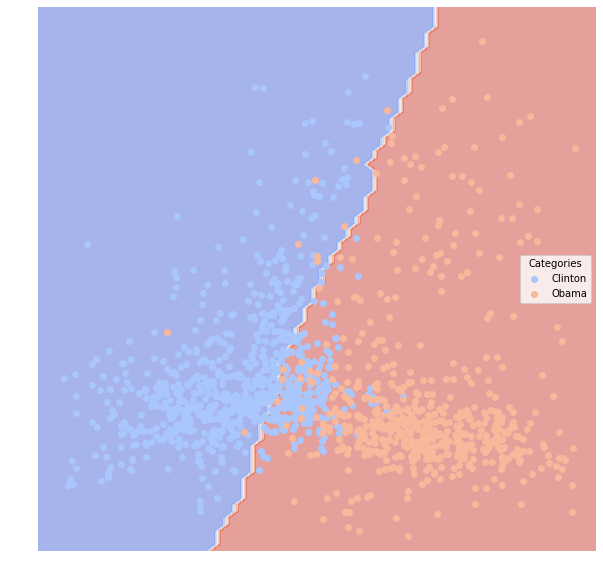

Method: Neural Net; (Real Dataset 2: SenateSmall)


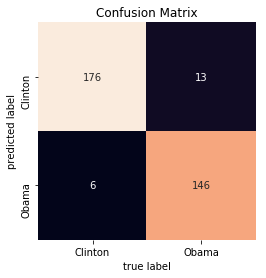

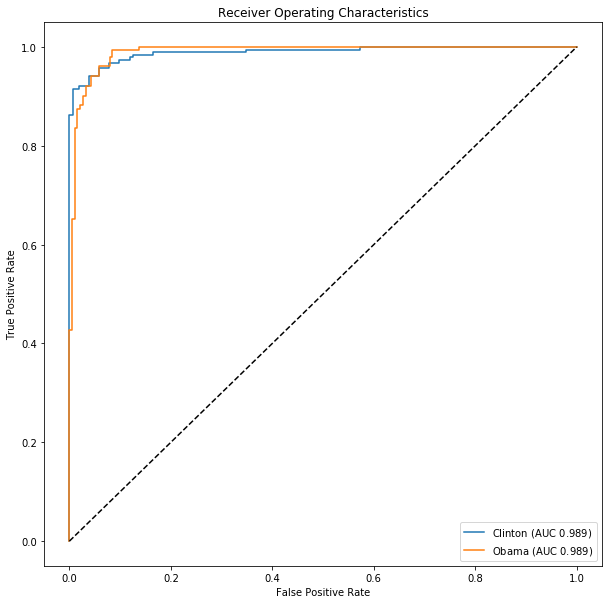

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


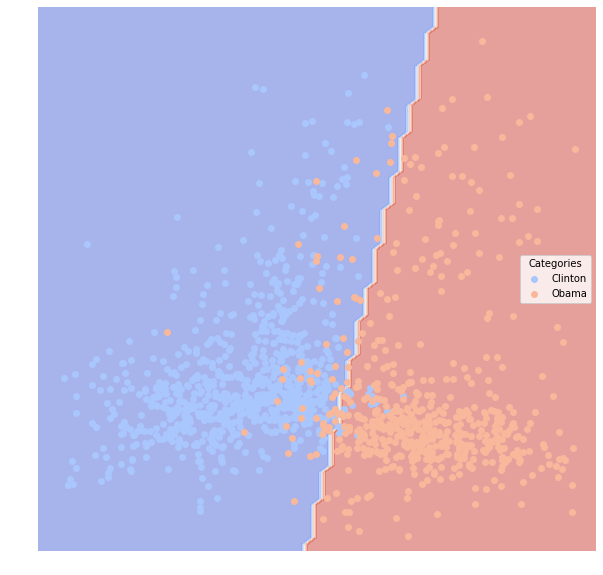

Method: Gradient Boosting; (Real Dataset 2: SenateSmall)


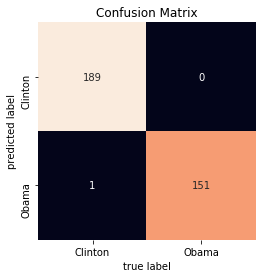

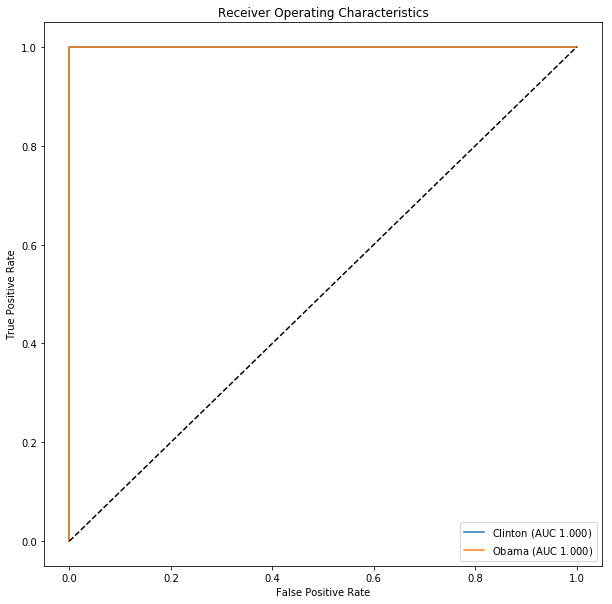

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


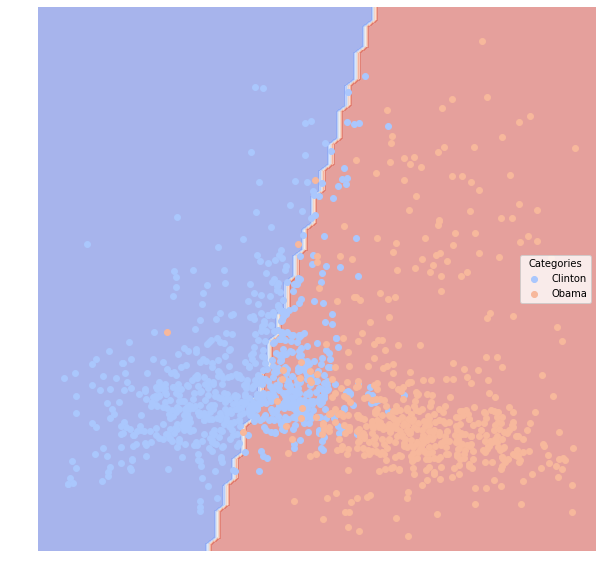

Method: AdaBoost; (Real Dataset 2: SenateSmall)


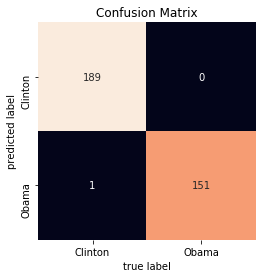

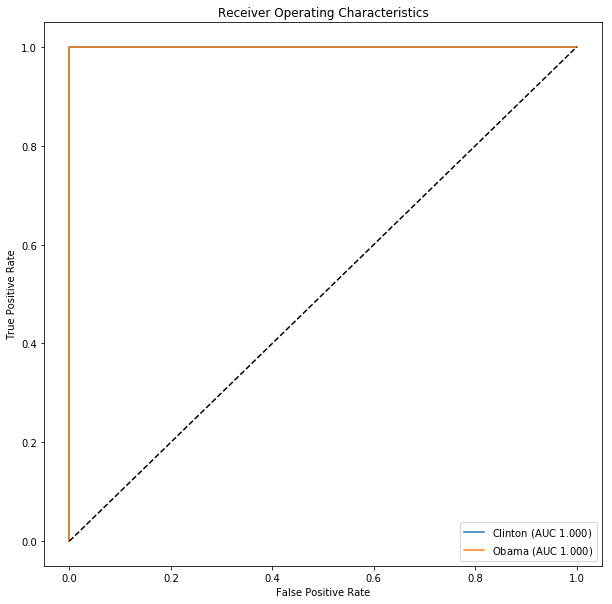

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


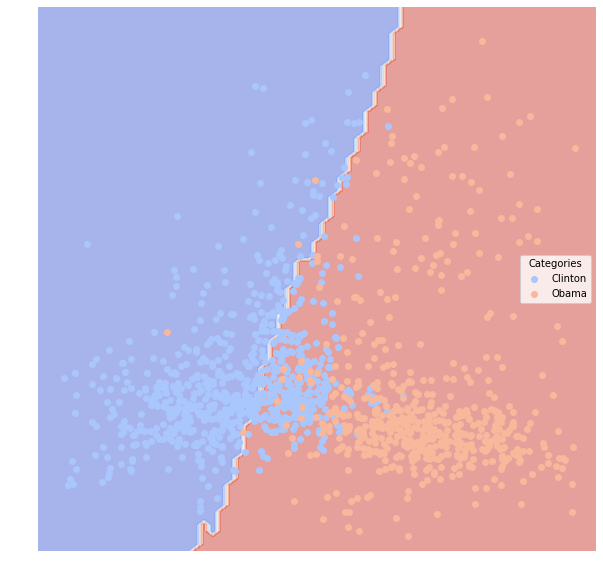

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Real Dataset 3: SenateLarge


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


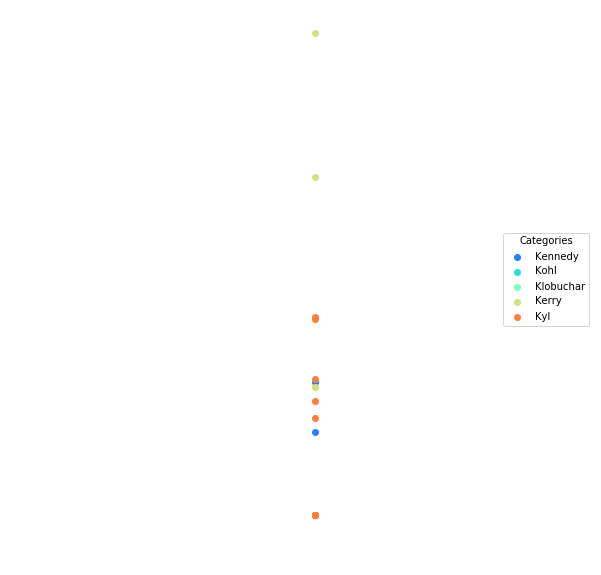

Method: Naive Bayes; (Real Dataset 3: SenateLarge)


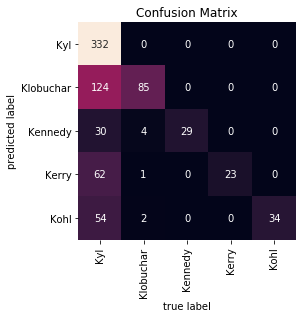

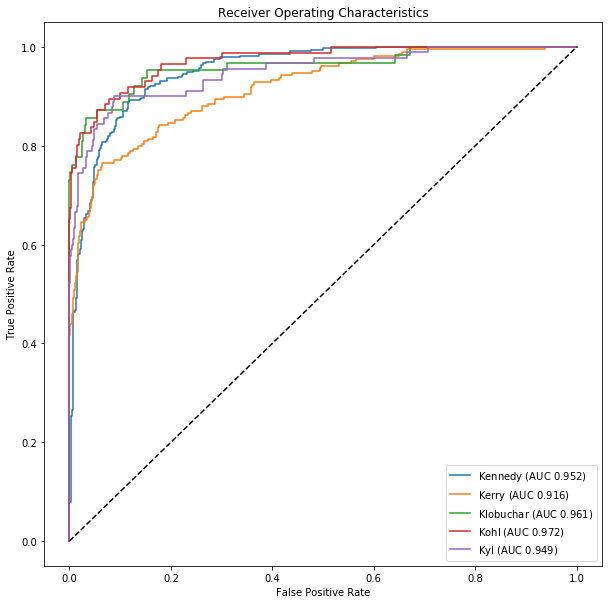

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

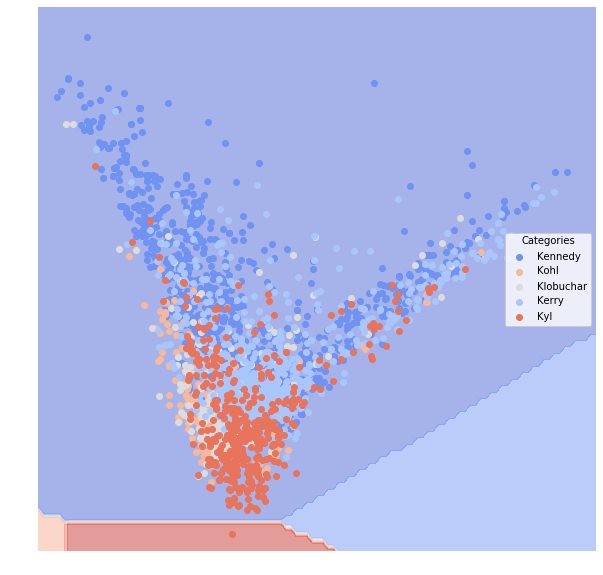

Method: Linear SVM; (Real Dataset 3: SenateLarge)


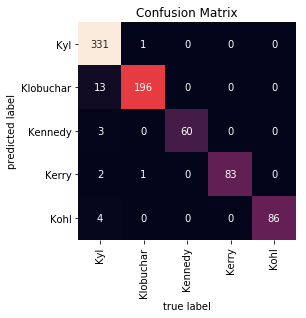

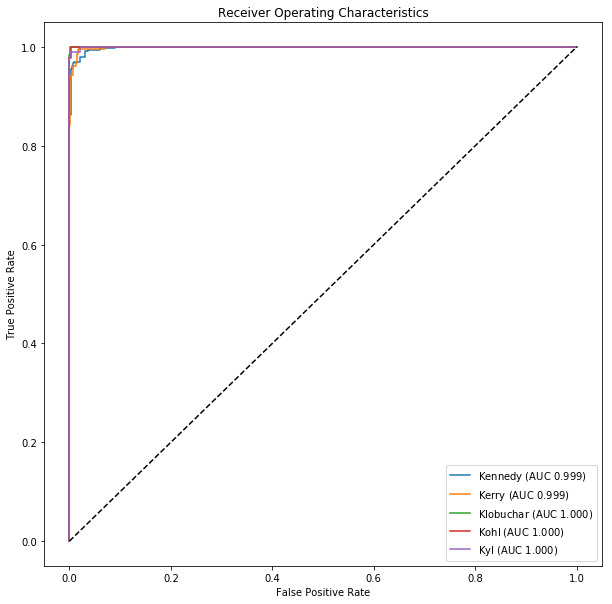

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

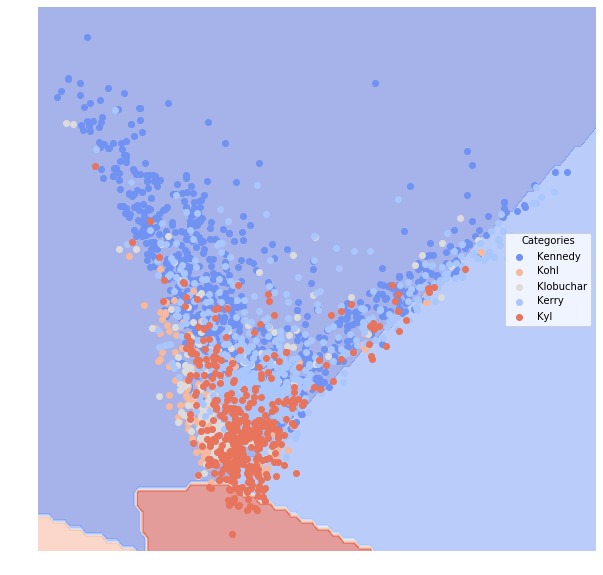

Method: Polynomial SVM; (Real Dataset 3: SenateLarge)


/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/software/A

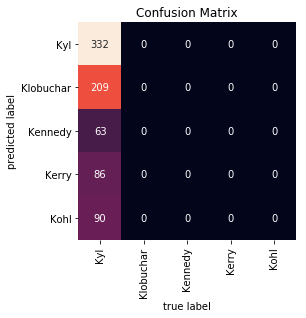

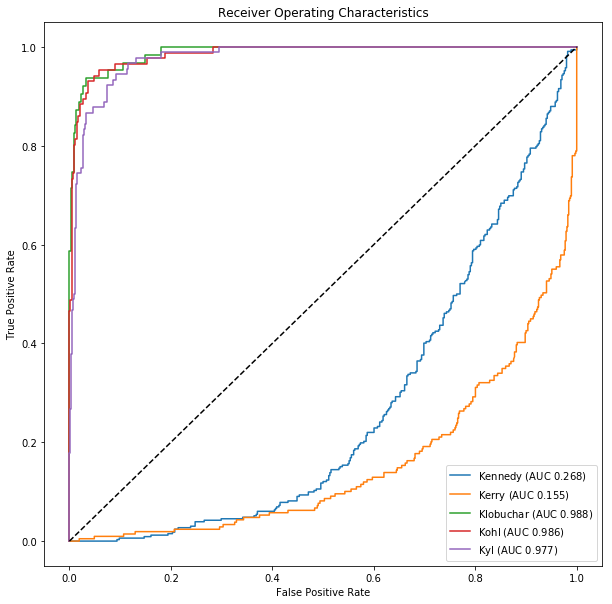

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

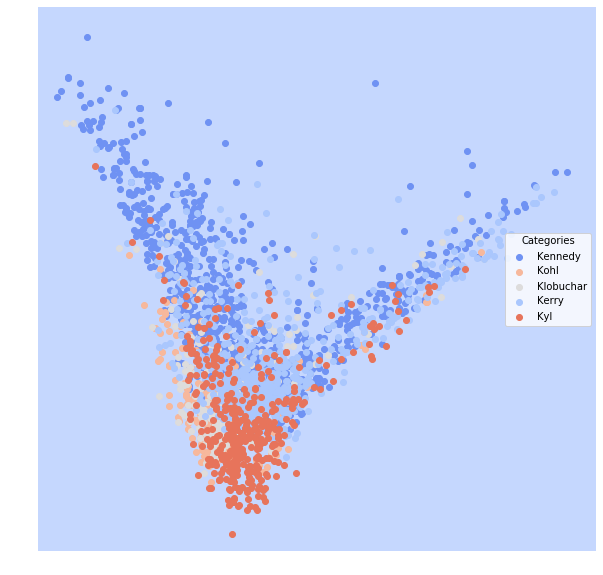

Method: k-Nearest Neighbors; (Real Dataset 3: SenateLarge)


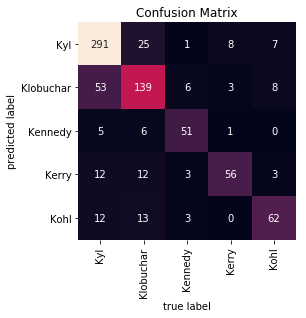

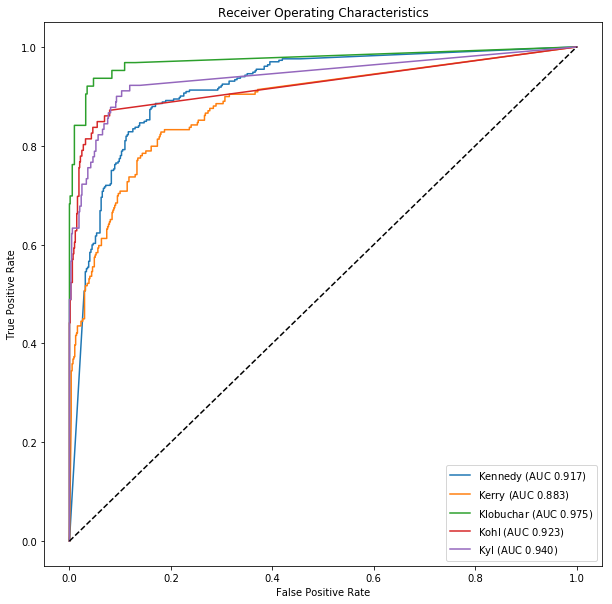

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

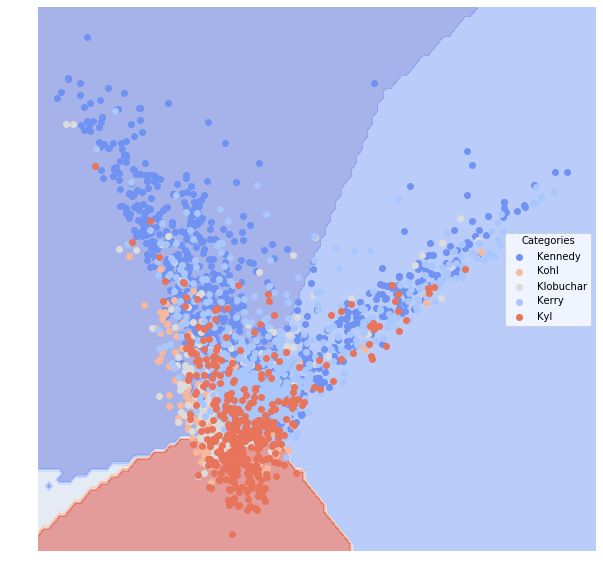

Method: Logistic Regression; (Real Dataset 3: SenateLarge)


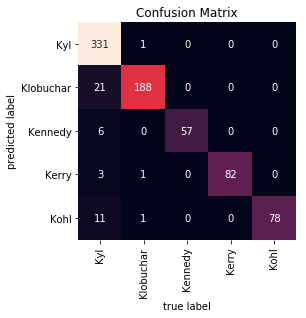

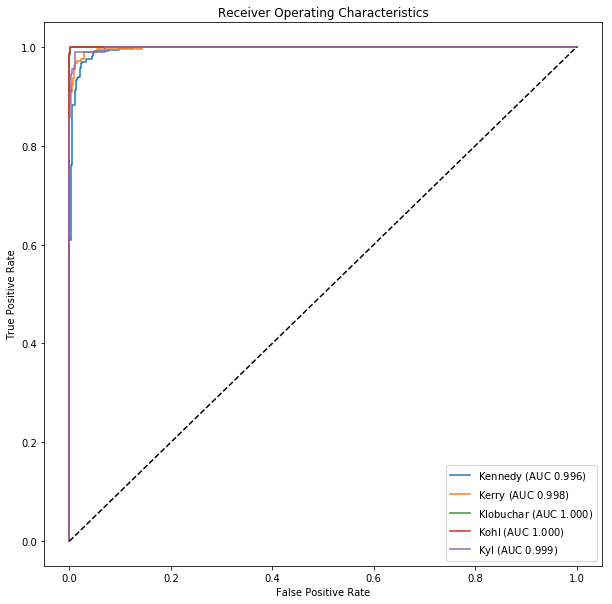

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

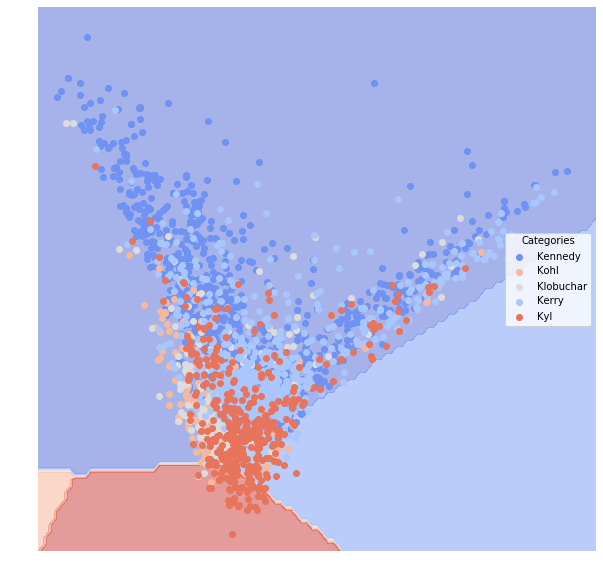

Method: Decision Tree; (Real Dataset 3: SenateLarge)


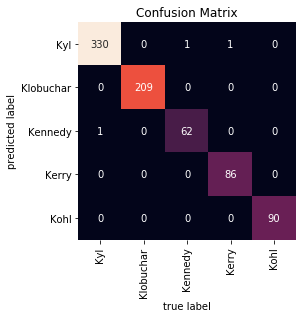

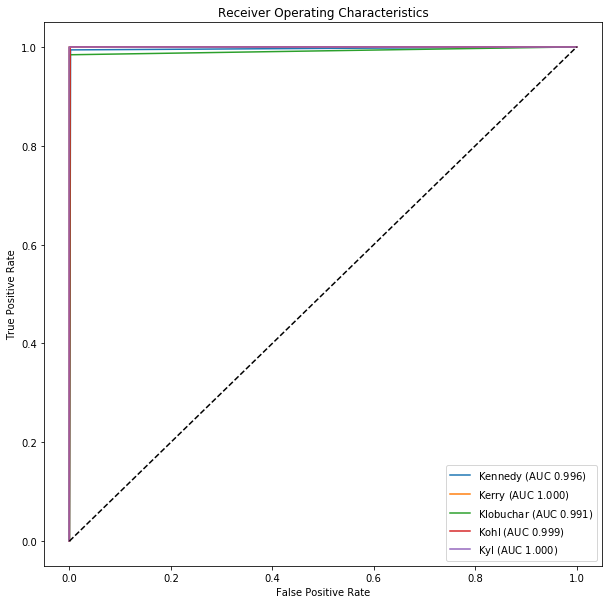

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

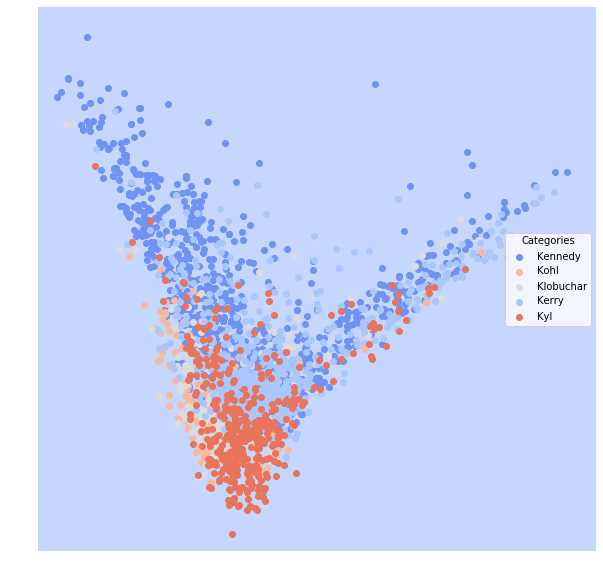

Method: Random Forest; (Real Dataset 3: SenateLarge)


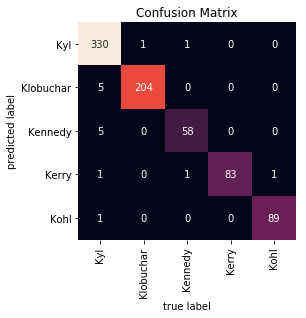

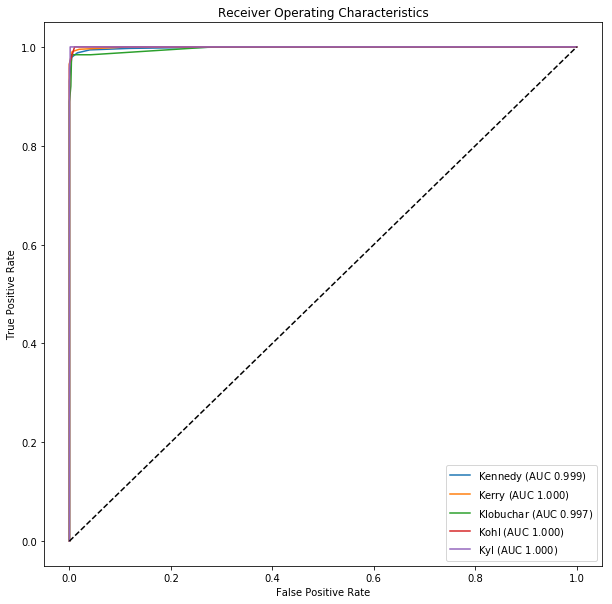

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

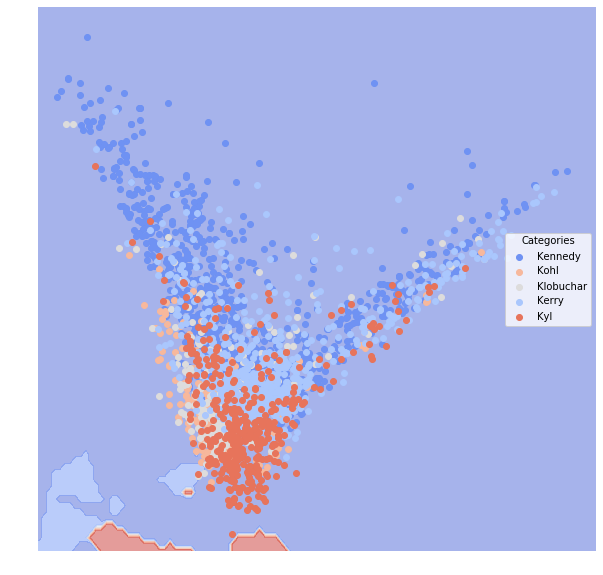

Method: Neural Net; (Real Dataset 3: SenateLarge)


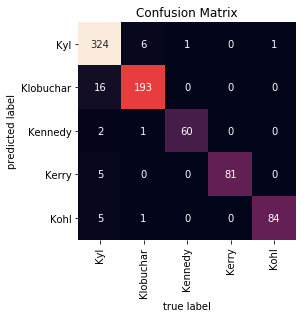

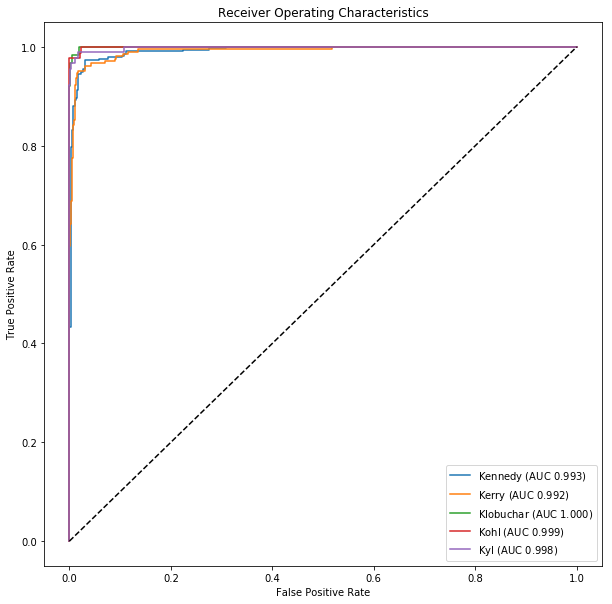

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

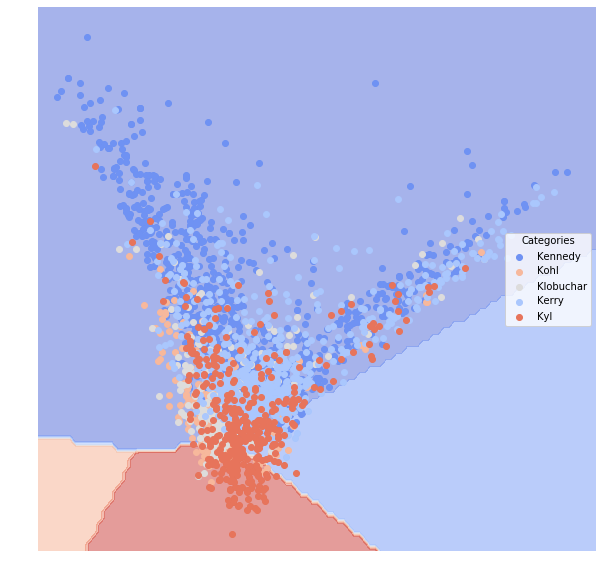

Method: Gradient Boosting; (Real Dataset 3: SenateLarge)


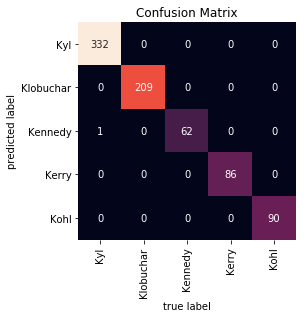

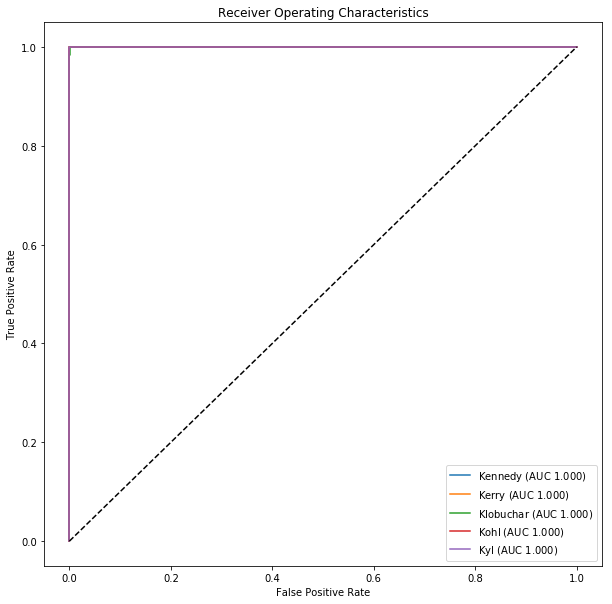

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

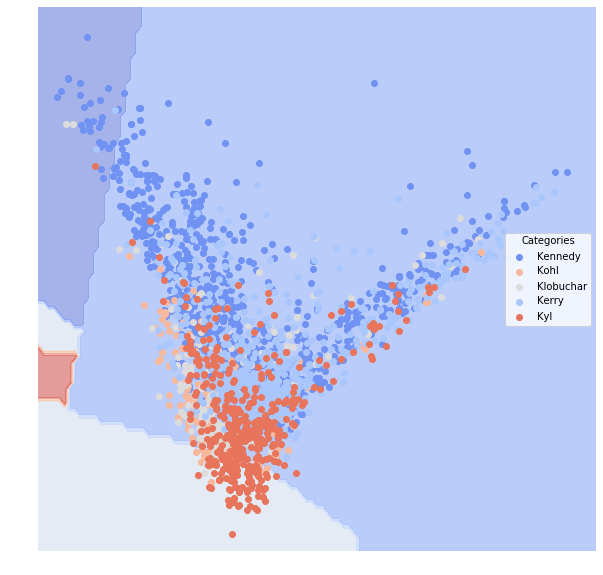

Method: AdaBoost; (Real Dataset 3: SenateLarge)


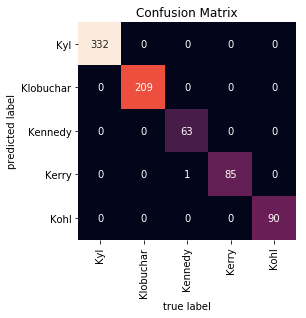

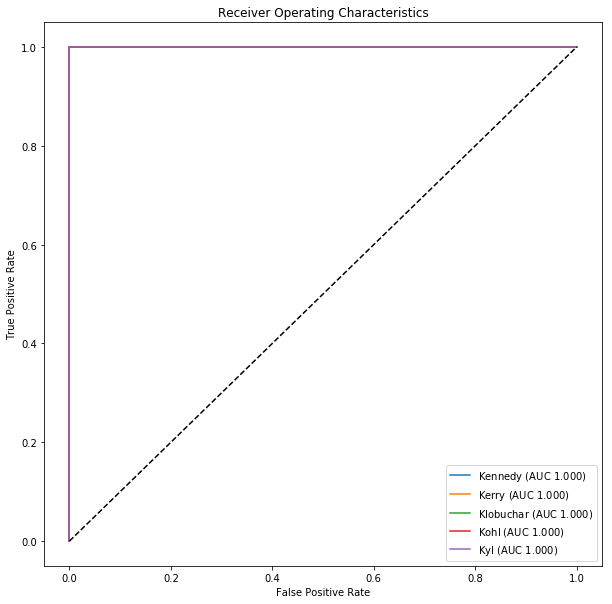

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

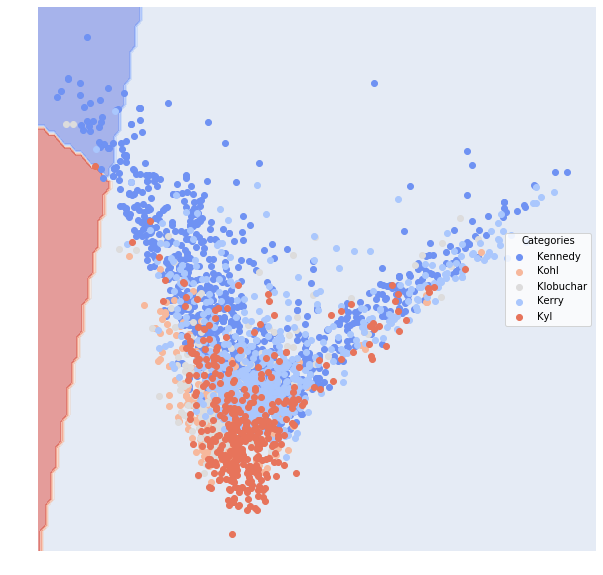

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Real Dataset 4: Spam


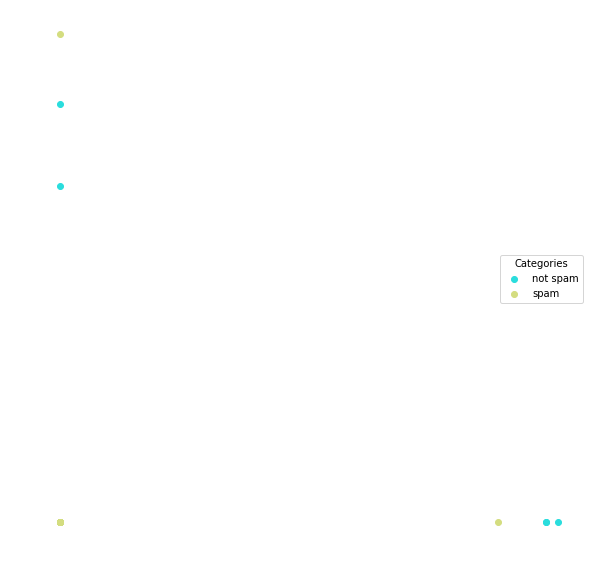

Method: Naive Bayes; (Real Dataset 4: Spam)


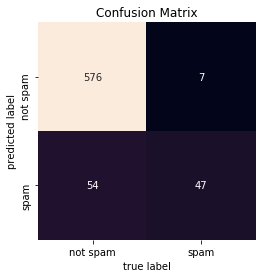

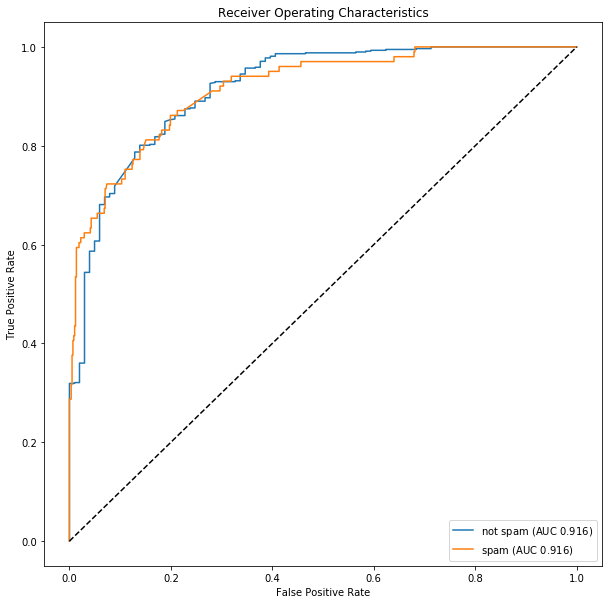

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


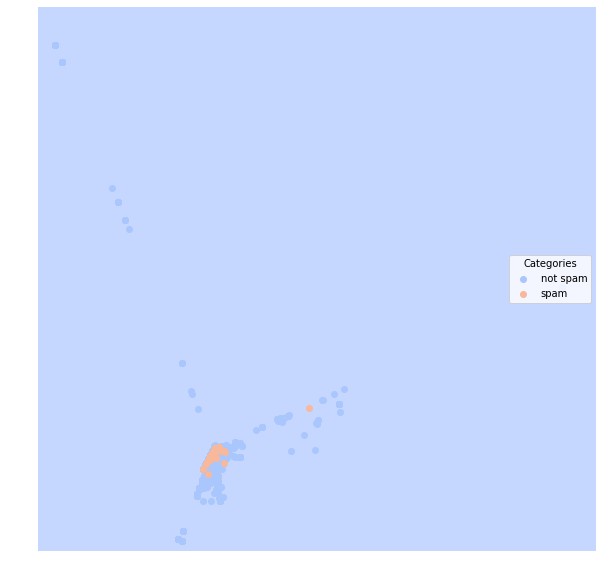

Method: Linear SVM; (Real Dataset 4: Spam)


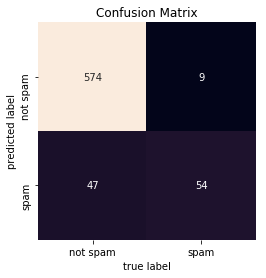

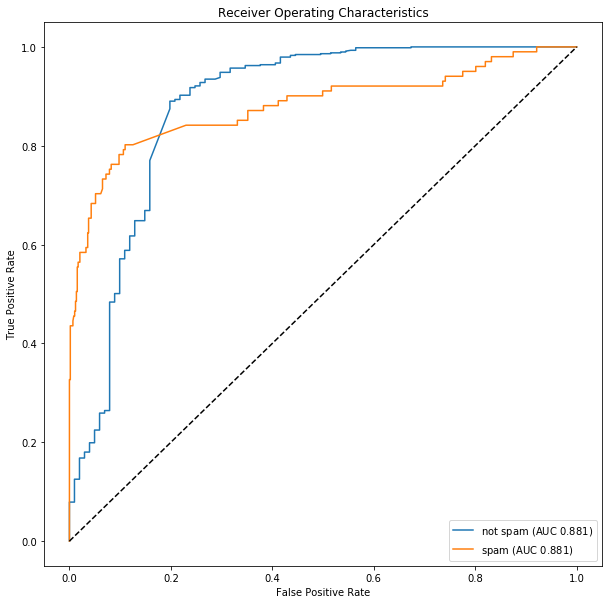

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


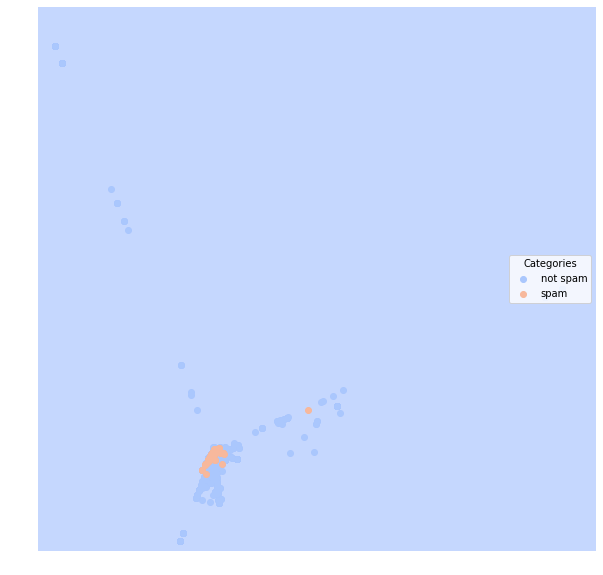

Method: Polynomial SVM; (Real Dataset 4: Spam)


/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


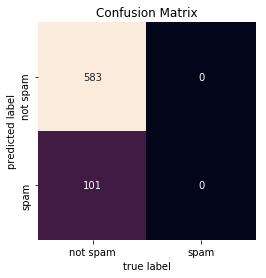

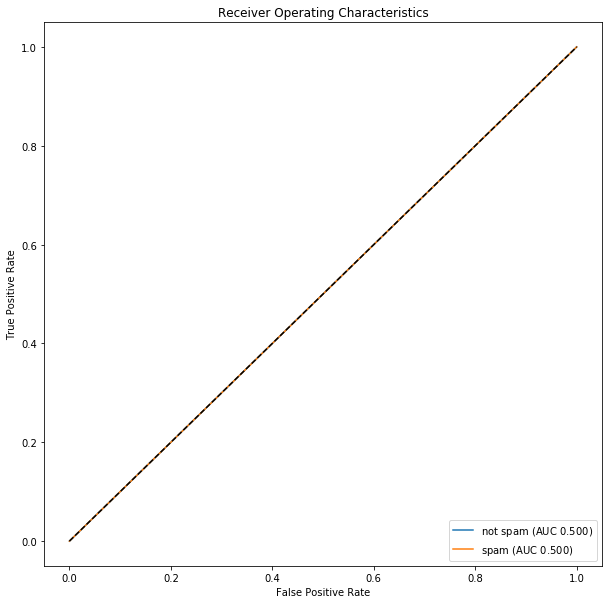

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


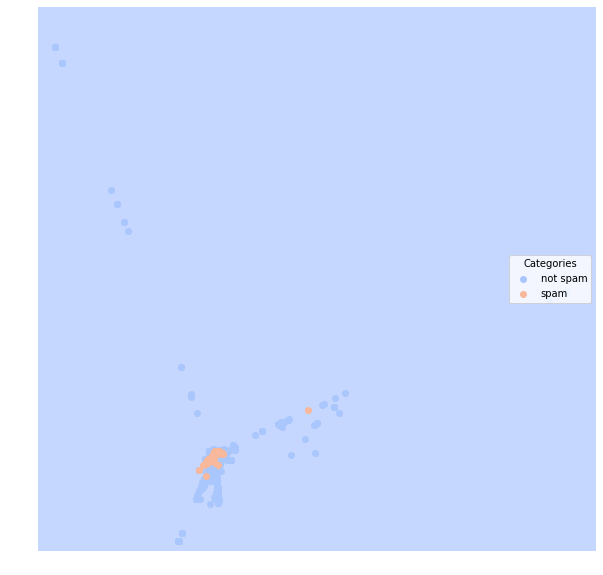

Method: k-Nearest Neighbors; (Real Dataset 4: Spam)


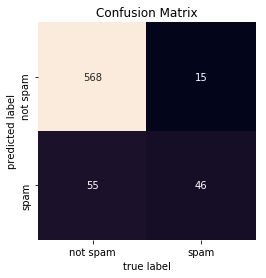

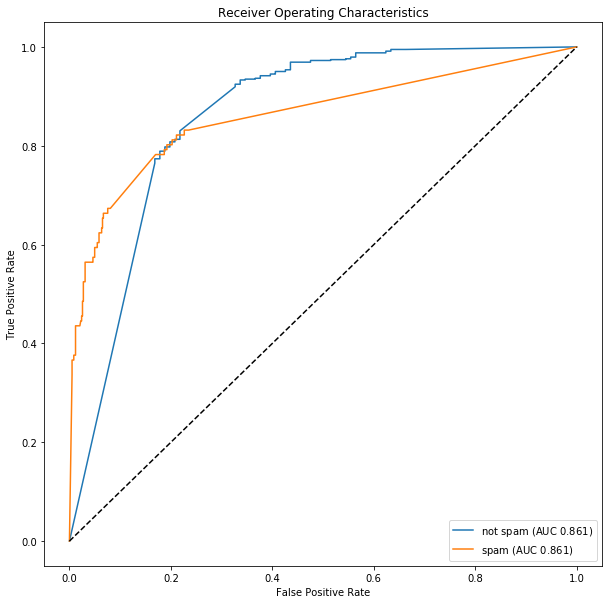

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


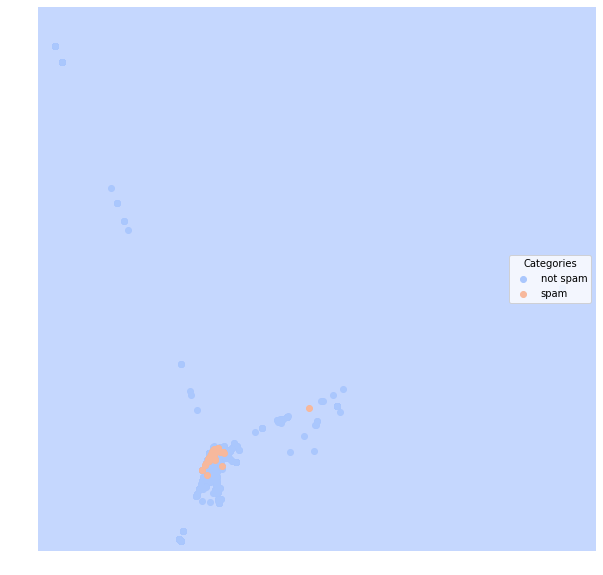

Method: Logistic Regression; (Real Dataset 4: Spam)


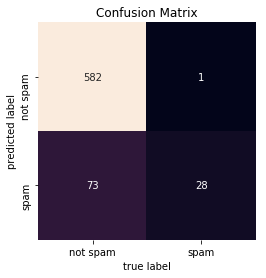

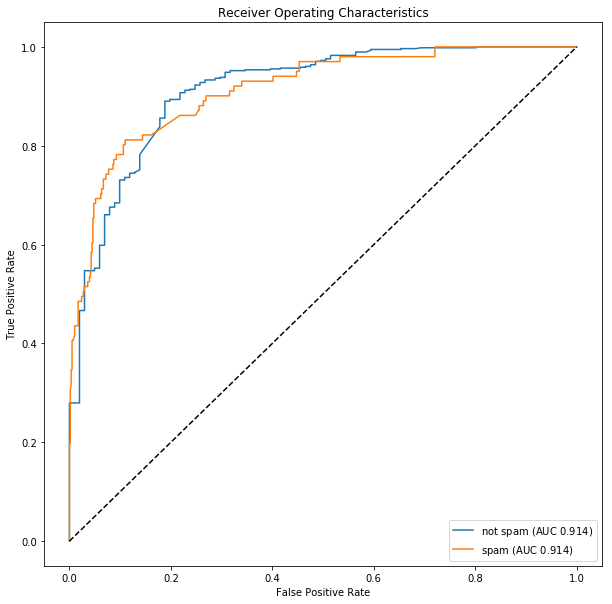

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


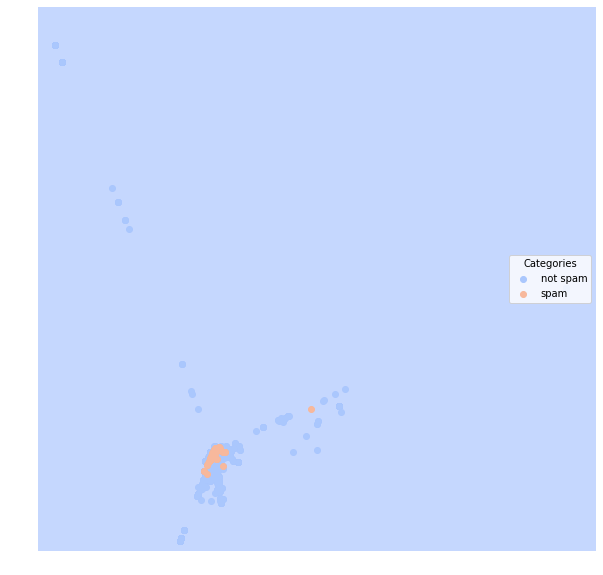

Method: Decision Tree; (Real Dataset 4: Spam)


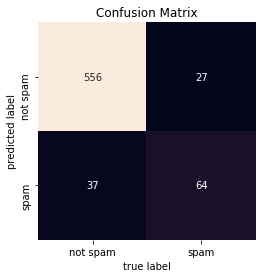

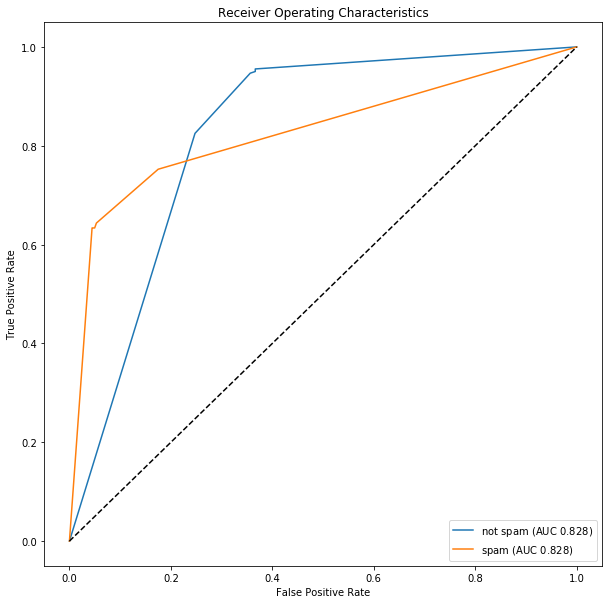

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


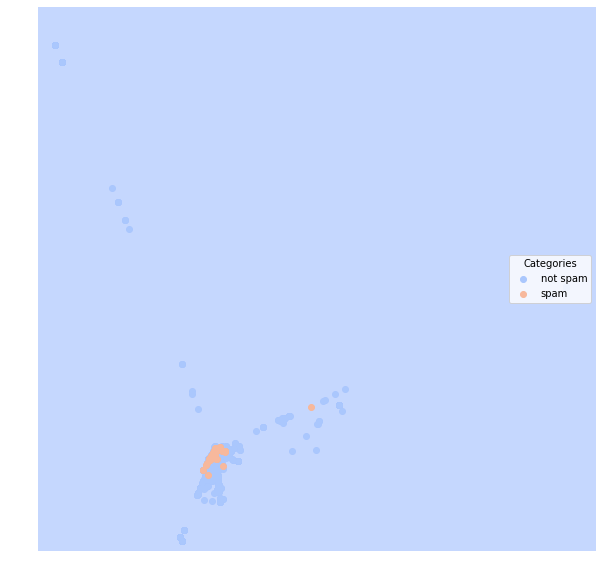

Method: Random Forest; (Real Dataset 4: Spam)


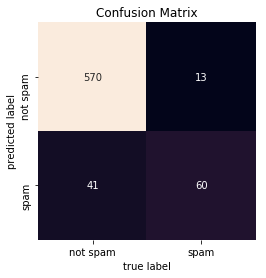

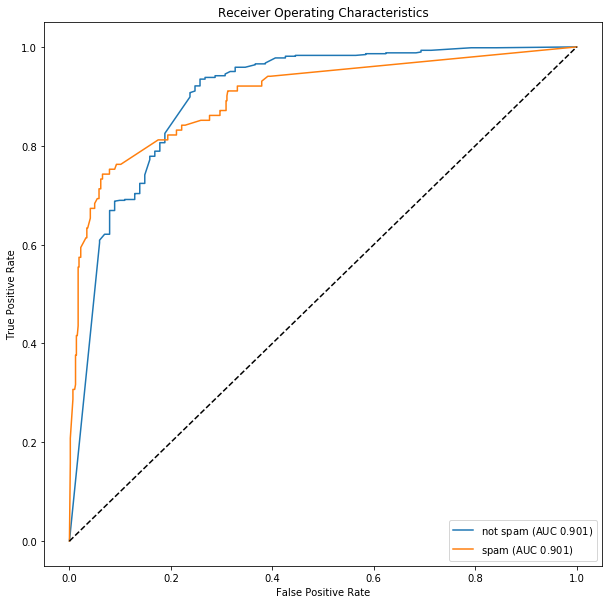

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


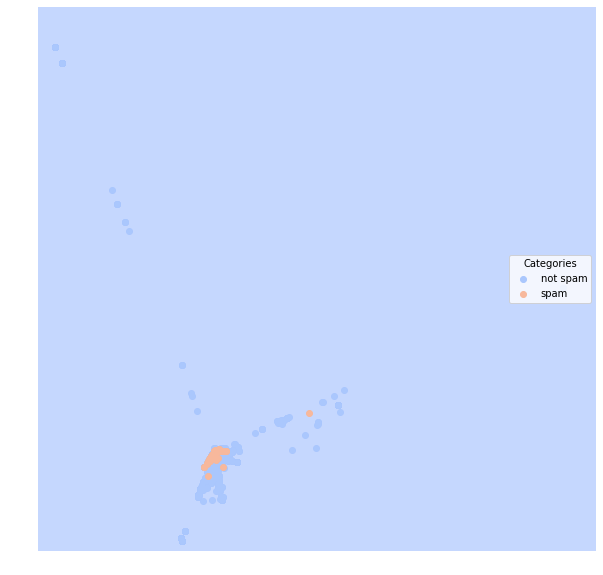

Method: Neural Net; (Real Dataset 4: Spam)


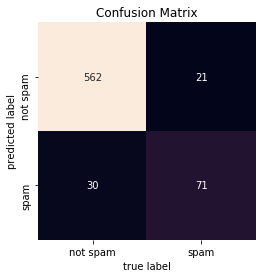

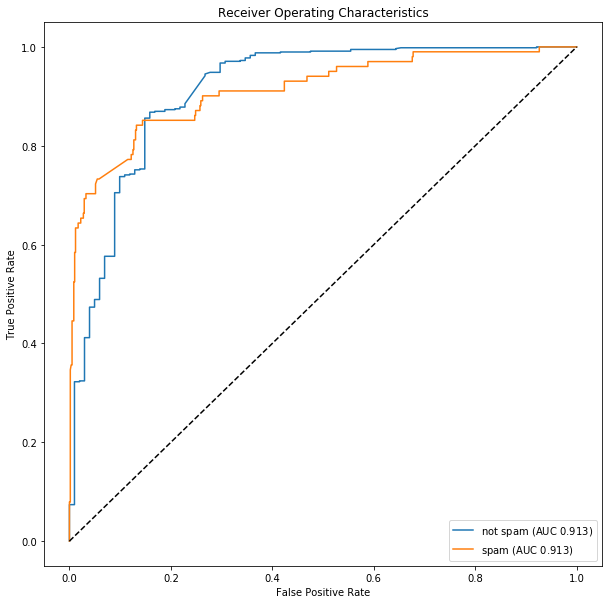

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


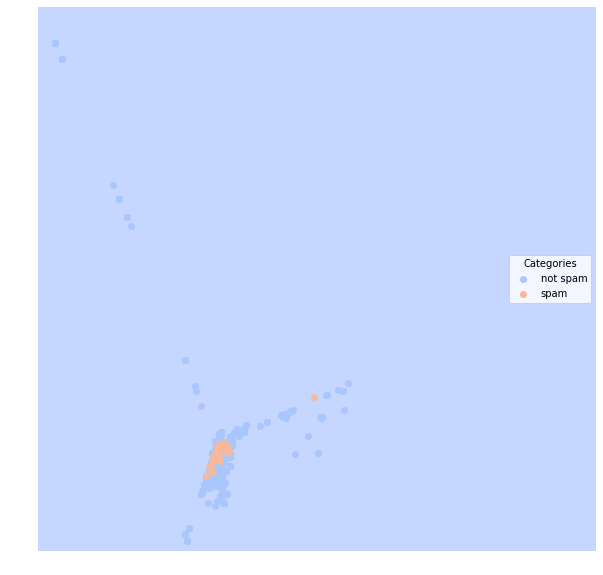

Method: Gradient Boosting; (Real Dataset 4: Spam)


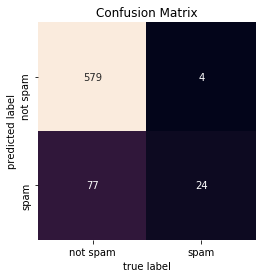

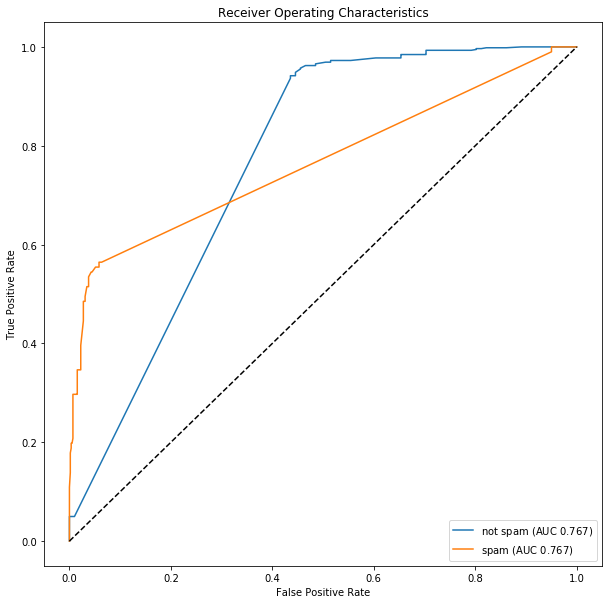

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


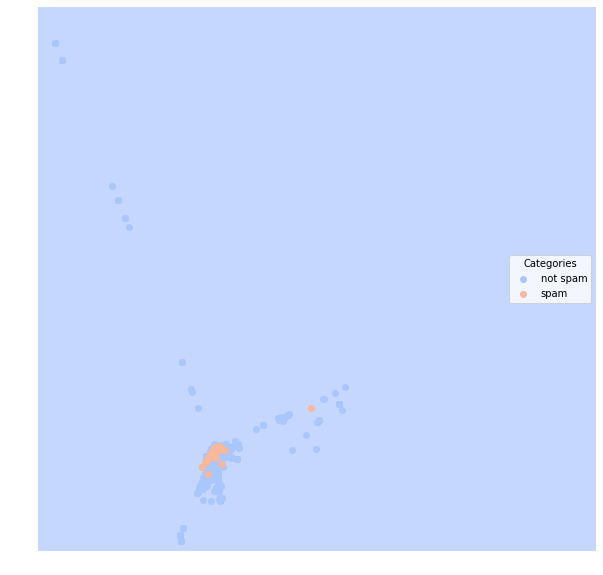

Method: AdaBoost; (Real Dataset 4: Spam)


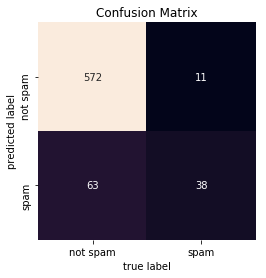

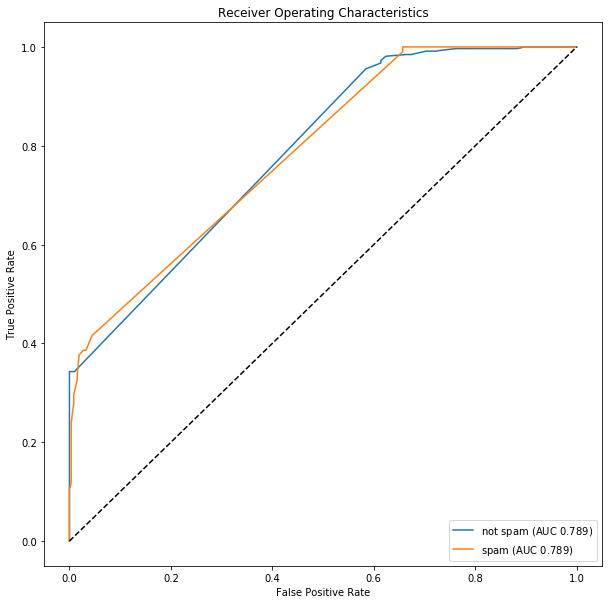

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


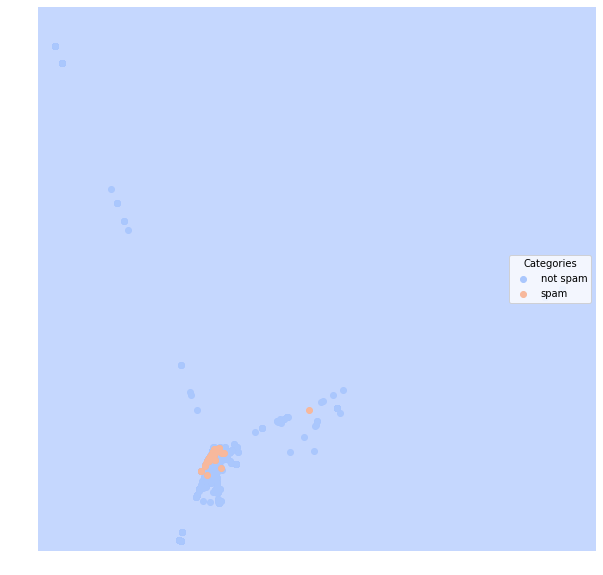

In [37]:
realscores_dict = {}
i = 1
for df_name, df_array in realdata_dict.items():
    dfTrain, dfTest = lucem_illud_2020.trainTestSplit(df_array)
    df_message = "Real Dataset {}: {}".format(i, df_name)
    print(df_message)
    lucem_illud_2020.plotter(dfTrain)
    
    for name, clf in zip(clf_names, realclf_list):
        print("Method: {}; ({})".format(name[0], df_message))
        predict_colname = 'predict_' + name[1]
        score_keyname = df_name + "_" + name[1]
        clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
        dfTest[predict_colname] = clf.predict(np.stack(dfTest['vect'], axis=0))
        realscores_dict[score_keyname] = {
            "accuracy_train":clf.score(np.stack(dfTrain['vect'], axis=0), dfTrain['category']),
            "accuracy_test":clf.score(np.stack(dfTest['vect'], axis=0), dfTest['category']),
            "precision": sklearn.metrics.precision_score(dfTest[predict_colname], dfTest['category'], average=None),
            "recall": sklearn.metrics.recall_score(dfTest[predict_colname], dfTest['category'], average=None),
            "f1": sklearn.metrics.f1_score(dfTest[predict_colname], dfTest['category'], average=None)
        }
        lucem_illud_2020.evaluateClassifier(clf, dfTest)
        lucem_illud_2020.plotConfusionMatrix(clf, dfTest)
        lucem_illud_2020.plotMultiROC(clf, dfTest)
        lucem_illud_2020.plotregions(clf, dfTrain)
        
    i += 1    

In [85]:
realscores_df = pandas.DataFrame.from_dict(realscores_dict).transpose()
realscores_df2 = realscores_df
realscores_df2['f1'] = [x.round(3) for x in realscores_df['f1']]
realscores_df2['precision'] = [x.round(3) for x in realscores_df['precision']]
realscores_df2['recall'] = [x.round(3) for x in realscores_df['recall']]
realscores_df2

accuracy_test accuracy_train  \
Reddit_nbayes             0.968652       0.986708   
Reddit_lsvm               0.981191       0.998436   
Reddit_psvm               0.219436       0.258014   
Reddit_knn                0.899687              1   
Reddit_logit              0.974922       0.992181   
Reddit_dtree              0.884013              1   
Reddit_rf                 0.918495       0.996873   
Reddit_nn_mlp             0.965517              1   
Reddit_gboost             0.949843       0.999218   
Reddit_adaboost           0.931034       0.924941   
SenateSmall_nbayes        0.938416        0.97076   
SenateSmall_lsvm          0.991202       0.998538   
SenateSmall_psvm          0.554252       0.592836   
SenateSmall_knn            0.86217              1   
SenateSmall_logit         0.973607       0.994883   
SenateSmall_dtree         0.997067              1   
SenateSmall_rf                   1              1   
SenateSmall_nn_mlp        0.944282              1   
SenateSmall_gboost        0.997067              1   
SenateSmall_adaboost      0.997067              1   
SenateLarge_nbayes        0.644872        0.72023   
SenateLarge_lsvm          0.969231       0.994238   
SenateLarge_psvm          0.425641         0.4363   
SenateLarge_knn           0.767949              1   
SenateLarge_logit          0.94359       0.975352   
SenateLarge_dtree         0.996154              1   
SenateLarge_rf            0.979487              1   
SenateLarge_nn_mlp        0.951282              1   
SenateLarge_gboost        0.998718              1   
SenateLarge_adaboost      0.998718        0.99936   
Spam_nbayes               0.910819       0.934648   
Spam_lsvm                 0.918129       0.952172   
Spam_psvm                 0.852339       0.853231   
Spam_knn                  0.897661       0.986126   
Spam_logit                0.891813        0.90471   
Spam_dtree                0.906433       0.986126   
Spam_rf                   0.921053       0.980285   
Spam_nn_mlp               0.925439       0.985396   
Spam_gboost               0.881579       0.910186   
Spam_adaboost             0.891813       0.920774   

                                                       f1  \
Reddit_nbayes                [0.961, 0.947, 0.993, 0.976]   
Reddit_lsvm                    [0.972, 0.959, 1.0, 0.994]   
Reddit_psvm                         [0.0, 0.0, 0.36, 0.0]   
Reddit_knn                   [0.914, 0.859, 0.943, 0.884]   
Reddit_logit                   [0.961, 0.954, 1.0, 0.988]   
Reddit_dtree                 [0.909, 0.887, 0.827, 0.899]   
Reddit_rf                    [0.945, 0.904, 0.899, 0.919]   
Reddit_nn_mlp                [0.961, 0.946, 0.993, 0.965]   
Reddit_gboost                 [0.972, 0.947, 0.91, 0.964]   
Reddit_adaboost              [0.925, 0.934, 0.913, 0.951]   
SenateSmall_nbayes                          [0.945, 0.93]   
SenateSmall_lsvm                            [0.992, 0.99]   
SenateSmall_psvm                             [0.713, 0.0]   
SenateSmall_knn                            [0.875, 0.846]   
SenateSmall_logit                           [0.977, 0.97]   
SenateSmall_dtree                          [0.997, 0.997]   
SenateSmall_rf                                 [1.0, 1.0]   
SenateSmall_nn_mlp                         [0.949, 0.939]   
SenateSmall_gboost                         [0.997, 0.997]   
SenateSmall_adaboost                       [0.997, 0.997]   
SenateLarge_nbayes     [0.711, 0.565, 0.63, 0.422, 0.548]   
SenateLarge_lsvm      [0.966, 0.963, 0.976, 0.982, 0.977]   
SenateLarge_psvm              [0.597, 0.0, 0.0, 0.0, 0.0]   
SenateLarge_knn       [0.826, 0.688, 0.803, 0.727, 0.729]   
SenateLarge_logit        [0.94, 0.94, 0.95, 0.976, 0.929]   
SenateLarge_dtree         [0.995, 1.0, 0.984, 0.994, 1.0]   
SenateLarge_rf        [0.979, 0.986, 0.943, 0.982, 0.989]   
SenateLarge_nn_mlp      [0.947, 0.941, 0.968, 0.97, 0.96]   
SenateLarge_gboost          [0.998, 1.0, 0.992, 1.0, 1.0]   
SenateLarge_adabo

## Reddit Data

Naive Bayes and linear SVM perform best here. The content from the different subreddits are quite distinct, given they speak to different interests. It's intuitive that a probabilistic classifier like the Naive Bayes would have great success here since certain types of works would be more closely associated with certain subcultures.

## SenateSmall Data

Random Forests perform best here, along with the linear classifiers. The two categories are very distinct, with little overlap, making the identification of the decision boundary relatively easier. Senators Clinton and Obama, at the time, represented two very different types of office-holders owing to a host of reasons (seniority, issues), and that's evident in the data here.

## SenateLarge Data

Ensemble methods (gradient boost and AdaBoost) perform best here, but the linear SVMs do a great job too. 

## Spam Data 

Neural Nets perform best here. But the class-specific scores vary, the performance is much lower on the `Spam` category than `Not Spam`. Naive Bayes and SVMs do very well too.  